In [1]:
import tensorflow as tf
import tfx

ModuleNotFoundError: No module named 'tensorflow'

# Setup

In [237]:
from pathlib import Path
import os, pandas as pd
from fastcore.all import *
import torch
import torchaudio

In [238]:
NB_DIR = Path.cwd()
#LOCAL_DATA = NB_DIR/'..'/'data'
DATA = Path('C://Users/Jens/Documents/V22/DAT255/data')
AUDIO_TAGGING = DATA/'freesound-audio-tagging'

In [239]:
from fastai.vision.all import *


In [240]:
AUDIO_TAGGING.ls()

(#6) [Path('C:/Users/Jens/Documents/V22/DAT255/data/freesound-audio-tagging/audio_test'),Path('C:/Users/Jens/Documents/V22/DAT255/data/freesound-audio-tagging/audio_train'),Path('C:/Users/Jens/Documents/V22/DAT255/data/freesound-audio-tagging/sample_submission.csv'),Path('C:/Users/Jens/Documents/V22/DAT255/data/freesound-audio-tagging/test_post_competition.csv'),Path('C:/Users/Jens/Documents/V22/DAT255/data/freesound-audio-tagging/train.csv'),Path('C:/Users/Jens/Documents/V22/DAT255/data/freesound-audio-tagging/train_post_competition.csv')]

# Loading data

In [241]:
df = pd.read_csv(AUDIO_TAGGING/'train.csv')
df.head()

fname         label  manually_verified
0  00044347.wav        Hi-hat                  0
1  001ca53d.wav     Saxophone                  1
2  002d256b.wav       Trumpet                  0
3  0033e230.wav  Glockenspiel                  1
4  00353774.wav         Cello                  1

In [242]:
df.shape

(9473, 3)

In [243]:
labels = df.label.unique()
print(labels)
print(len(labels))

['Hi-hat' 'Saxophone' 'Trumpet' 'Glockenspiel' 'Cello' 'Knock'
 'Gunshot_or_gunfire' 'Clarinet' 'Computer_keyboard' 'Keys_jangling'
 'Snare_drum' 'Writing' 'Laughter' 'Tearing' 'Fart' 'Oboe' 'Flute' 'Cough'
 'Telephone' 'Bark' 'Chime' 'Bass_drum' 'Bus' 'Squeak' 'Scissors'
 'Harmonica' 'Gong' 'Microwave_oven' 'Burping_or_eructation' 'Double_bass'
 'Shatter' 'Fireworks' 'Tambourine' 'Cowbell' 'Electric_piano' 'Meow'
 'Drawer_open_or_close' 'Applause' 'Acoustic_guitar' 'Violin_or_fiddle'
 'Finger_snapping']
41


In [244]:
AUDIO_DIR = AUDIO_TAGGING/'audio_train'
IMG_DIR = DATA/'imgs'
!mkdir {IMG_DIR} -p

A subdirectory or file C:\Users\Jens\Documents\V22\DAT255\data\imgs already exists.
Error occurred while processing: C:\Users\Jens\Documents\V22\DAT255\data\imgs.
A subdirectory or file -p already exists.
Error occurred while processing: -p.


In [245]:
AUDIO_DIR.ls()

(#9473) [Path('C:/Users/Jens/Documents/V22/DAT255/data/freesound-audio-tagging/audio_train/00044347.wav'),Path('C:/Users/Jens/Documents/V22/DAT255/data/freesound-audio-tagging/audio_train/001ca53d.wav'),Path('C:/Users/Jens/Documents/V22/DAT255/data/freesound-audio-tagging/audio_train/002d256b.wav'),Path('C:/Users/Jens/Documents/V22/DAT255/data/freesound-audio-tagging/audio_train/0033e230.wav'),Path('C:/Users/Jens/Documents/V22/DAT255/data/freesound-audio-tagging/audio_train/00353774.wav'),Path('C:/Users/Jens/Documents/V22/DAT255/data/freesound-audio-tagging/audio_train/003b91e8.wav'),Path('C:/Users/Jens/Documents/V22/DAT255/data/freesound-audio-tagging/audio_train/003da8e5.wav'),Path('C:/Users/Jens/Documents/V22/DAT255/data/freesound-audio-tagging/audio_train/0048fd00.wav'),Path('C:/Users/Jens/Documents/V22/DAT255/data/freesound-audio-tagging/audio_train/004ad66f.wav'),Path('C:/Users/Jens/Documents/V22/DAT255/data/freesound-audio-tagging/audio_train/0063ab88.wav')...]

# Exploring the data

In [246]:
from IPython.display import Audio
import librosa
import librosa.display

In [247]:
fnames = os.listdir(str(AUDIO_DIR))
len(fnames), fnames[:5]

(9473,
 ['00044347.wav',
  '001ca53d.wav',
  '002d256b.wav',
  '0033e230.wav',
  '00353774.wav'])

In [248]:
fn = fnames[40]
label = df.loc[df['fname'].eq(fn), 'label'].iloc[0]
print(label)
Audio(str(AUDIO_DIR/fn))

Clarinet


In [249]:
x, sample_rate = librosa.load(AUDIO_DIR/fn)
x.shape, sample_rate, x.dtype

((113337,), 22050, dtype('float32'))

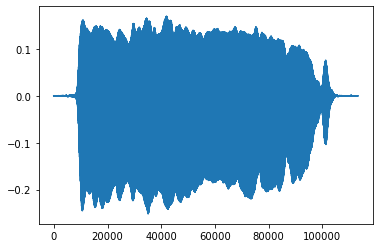

In [250]:
plt.plot(x)

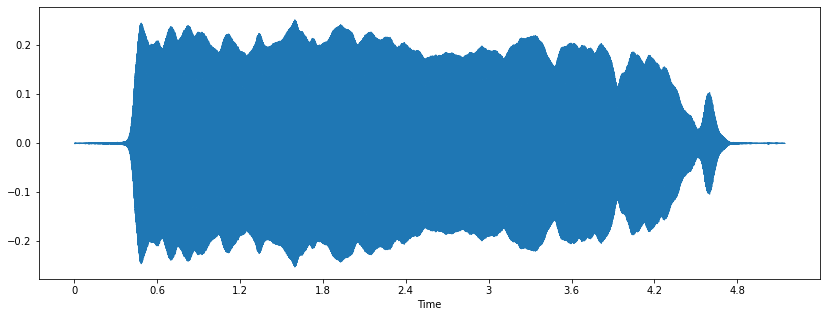

In [251]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sample_rate)

In [294]:
def log_mel_spec_tfm(fname, src_path, dst_path):
    x, sample_rate = librosa.load(src_path/fname)
    
    n_fft = 1024
    hop_length = 512
    n_mels = 80
    fmin = 20
    fmax = sample_rate / 2 
    
    mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft, 
                                                    hop_length=hop_length, 
                                                    n_mels=n_mels, power=2.0, 
                                                    fmin=fmin, fmax=fmax)
    
    #mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate)
    
    mel_spec_db = librosa.power_to_db(mel_spec_power, ref=np.max)
    
    label = df.loc[df['fname'].eq(fname), 'label'].iloc[0]
    
    dst_path = dst_path / label
    dst_path.mkdir(exist_ok=True)
    
    dst_fname = dst_path / (fname[:-4] + '.png')
    plt.imsave(dst_fname, mel_spec_db)

In [295]:
IMG_TRAIN = IMG_DIR / 'train'
IMG_TRAIN.mkdir(exist_ok=True)

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.6816542e-04  2.7756288e-04  1.9488559e-04 ... -2.2358532e-05
 -1.7488443e-05  6.2328600e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,


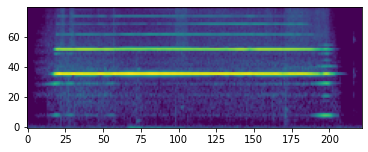

In [296]:
log_mel_spec_tfm(fn, AUDIO_DIR, IMG_TRAIN)
img = plt.imread(str(IMG_TRAIN/label/(fn[:-4] + '.png')))
plt.imshow(img, origin='lower');

In [151]:
#waveform, sr = torchaudio.load(AUDIO_DIR/fn)

In [152]:
# def show_melspectrogram(waveform,sample_rate):
#     mel_spectrogram = torchaudio.transforms.MelSpectrogram(sample_rate)(waveform)
#     print("Shape of spectrogram: {}".format(mel_spectrogram.size()))

#     plt.figure()
#     plt.imshow(mel_spectrogram.log2()[0,:,:].numpy(), cmap='viridis')

Shape of spectrogram: torch.Size([1, 128, 2929])


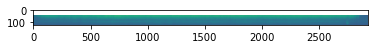

In [153]:
#show_melspectrogram(waveform, sr)

In [298]:
for i, file in enumerate(os.listdir(AUDIO_DIR)):
    log_mel_spec_tfm(os.fsdecode(file), AUDIO_DIR, IMG_TRAIN)

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.9568557e-04  1.8426297e-04 -5.5791304e-04 ... -7.0898874e-05
  4.4557814e-07  1.4329998e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-7.3037209e-04 -1.0996412e-03 -1.0551845e-03 ... -7.7292389e-05
 -3.8508577e-05 -2.1228403e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.8233735e-06 -3.2170559e-05 -4.6742720e-05 ... -4.8185842e-07
 -3.4471715e-05 -2.7238912e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 6.0691813e-04 -4.5909910e-05 -7.7290257e-04 ...  1.1572724e-03
  1.0504856e-03  7.7528559e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 5.7425706e-07 -2.7346825e-06 -2.9979588e-05 ... -8.1202616e-06
 -1.4345173e-05 -8.6932087e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 3.8065739e-02 -5.1684447e-02  6.6410400e-02 ... -3.1025149e-05
 -1.4982849e-05 -1.1691267e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-7.3804120e-03 -1.5163103e-02 -4.0881922e-03 ...  4.0656128e-06
  3.3043693e-06 -3.7405211e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 4.70880084e-02 -1.70545936e-01 -1.97989475e-02 ... -2.34734453e-05
 -3.57919198e-05 -1.29885575e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.1780934e-05  1.0058662e-05 -9.7868879e-06 ... -1.4381336e-05
 -1.8096869e-05 -1.0341126e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.8573091e-05 -3.3267390e-04 -5.0824304e-04 ... -1.0697445e-05
 -3.2324365e-06 -2.6850936e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.1550471e-03  2.9305553e-03  2.4800294e-03 ...  1.9340394e-05
 -2.7515948e-06 -2.7515454e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-5.9885555e-03 -5.4405760e-03 -6.4453441e-03 ... -8.9149635e-06
 -1.7918976e-05 -2.2494231e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.14736956e-05 -1.56266779e-05  1.77686197e-05 ... -1.08015865e-05
 -5.05851094e-05 -1.47385072e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.0357165e-05 -5.9944123e-05  1.2561511e-05 ... -7.5497182e-06
 -1.1936897e-05 -1.4526753e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 8.37179905e-05  1.06003274e-04  2.13090661e-05 ...  1.52149227e-07
 -3.15088037e-05 -5.50490149e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_ra

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.7645445e-05 -2.0523132e-05 -8.2903925e-06 ... -2.4550336e-05
 -2.0284597e-05 -2.6629526e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.5393086e-07 -1.5555861e-05 -1.3097478e-05 ... -3.8052152e-05
 -2.1423757e-05 -6.2715262e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-9.58300370e-06  3.72424211e-06 -2.83767258e-05 ... -1.41422515e-05
  1.78598420e-05  3.70657904e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.4290555e-04 -2.2926441e-04 -6.8594213e-04 ... -4.5428889e-05
 -3.0635809e-05 -1.5869688e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 8.4910747e-03  1.2367527e-02  1.1001211e-02 ... -2.0499625e-05
  2.3254086e-05 -2.1432441e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.6678184e-05 -7.9637452e-05 -1.7724682e-05 ... -3.1229203e-05
 -3.3289487e-06 -2.3308121e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-5.0536146e-05 -6.4424697e-05 -2.4018514e-04 ... -3.2542433e-05
 -1.4699172e-05  6.0580192e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.5179197e-03  1.2240792e-03  4.3659182e-03 ... -1.5084398e-05
 -5.8739017e-05  1.0247676e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.4841477e-02  3.0158542e-02  4.0401846e-02 ... -2.5749367e-05
 -2.2413857e-05  2.3862978e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 3.9879282e-04  1.2826485e-03  1.2744004e-03 ... -2.9695278e-05
  7.9153633e-06  3.4152934e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.0656769e-05 -9.2682940e-06 -2.6072499e-05 ...  1.0083348e-05
 -4.6410241e-05 -4.5340599e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[1.5121209e-04 2.9951174e-05 9.6940508e-05 ... 1.6228820e-04 1.5698478e-04
 1.3517482e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-4.9912874e-06  1.3553569e-05  1.9928388e-05 ...  3.3998169e-04
  3.3630326e-04  3.6160095e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.8354986e-02 -2.3539050e-03 -4.5098819e-02 ... -8.7752560e-06
  2.1972596e-06  1.9213443e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-5.3019694e-04  5.1537133e-03  9.1551803e-03 ... -6.0030321e-05
 -2.3045424e-05  1.4752573e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 4.0203234e-04  4.4416284e-04  3.1416967e-05 ... -1.9418909e-05
 -3.5768866e-05 -2.1018279e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.0850328e-05  4.3568616e-06 -2.3577903e-05 ... -7.5340613e-06
  5.7061417e-05  6.1076543e-07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.2288896e-05 -3.9377130e-05 -4.1822372e-05 ... -1.7461112e-05
  3.9928433e-05 -2.7824133e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 4.2134189e-04  6.3329126e-04  4.8654858e-04 ... -3.2529202e-05
 -1.7353328e-05 -2.8029124e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.9603276e-05  1.1929488e-05 -3.9306517e-05 ... -1.2829192e-05
 -6.4895988e-07 -6.8432768e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.8569376e-04 -2.7930088e-04 -1.0013172e-04 ... -5.8849302e-05
  2.2749849e-05  8.2891011e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.9344027e-03 -2.8432375e-03 -2.5153889e-03 ... -4.6980356e-05
 -2.0744192e-05  1.7371440e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 9.0891925e-05  5.7845627e-05 -2.5107272e-06 ... -2.4523561e-05
 -5.2866840e-06  4.5267248e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-0.02864844 -0.02980593 -0.00786273 ... -0.00385629  0.00516073
  0.00201692] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-inpu

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.2292991e-04  1.1830152e-04 -4.3291915e-05 ...  5.0560079e-06
 -1.0894368e-05 -3.0980707e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 4.1656704e-06 -1.2372023e-05 -4.4420605e-05 ... -2.2615030e-05
 -3.1994496e-05 -4.5271594e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-7.6430460e-06  2.7402153e-05  8.9722080e-06 ... -1.9852199e-05
 -6.4220694e-05 -2.0027446e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-8.4594167e-06 -1.6239324e-05 -3.0320116e-05 ... -2.3961858e-05
 -2.0700058e-05 -2.3858577e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-8.0118020e-04 -1.2402558e-03 -5.9898646e-04 ... -2.2104981e-05
 -6.2817926e-06 -2.6915972e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.14899576e-01 -1.52581453e-01 -1.39347598e-01 ...  1.98542039e-05
 -1.00462512e-05 -1.61684384e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-0.00029773 -0.00051904 -0.0007448  ... -0.00042975 -0.0002668
 -0.00070365] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 5.3587263e-03 -1.8472306e-02 -9.5774651e-02 ...  5.9495037e-06
 -2.4274790e-05 -2.3065873e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-5.3979944e-02  7.3486730e-03  5.3399611e-01 ...  3.5209357e-08
  5.7255102e-06 -2.0062065e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-5.1112379e-06 -4.1527423e-05 -2.4764264e-05 ...  6.6284060e-06
 -2.8361932e-05 -1.5909236e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.5464843e-02 -1.6873045e-02 -8.4412592e-03 ... -3.4803368e-05
 -5.4790584e-05  6.1899577e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 3.6644583e-04  3.7796277e-04  9.2420560e-05 ... -8.9388222e-06
 -5.3815675e-06 -3.8818507e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 6.5426284e-04  9.9359185e-04  9.1775676e-04 ... -5.5108753e-06
  1.9037310e-06  5.8113319e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.8627035e-03 -1.8446388e-03 -9.8686118e-04 ... -4.0101218e-05
 -7.3919077e-06  8.4317107e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-7.53719136e-02 -1.12945125e-01 -1.10593423e-01 ... -3.16752676e-06
 -6.40346889e-06 -3.44639884e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-4.8406432e-06 -1.0370195e-05 -6.0678274e-05 ...  6.6530934e-05
  7.4536685e-05  1.1793376e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-4.4871151e-05 -2.0148022e-05 -1.0820442e-05 ... -2.3303426e-06
 -2.4316802e-05 -7.2510971e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.7452387e-04  4.2415912e-05  8.6014689e-04 ...  9.2757364e-06
 -4.4863805e-06 -2.0614378e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-9.3670720e-03 -1.4728327e-02 -1.4356051e-02 ...  4.7042909e-06
 -6.6084494e-06 -3.1658452e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.0643396e-05 -4.2415457e-05 -5.3007458e-05 ... -9.4216966e-06
  3.1040570e-05  1.9522204e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.6707830e-03 -5.0016213e-03 -5.8523435e-03 ... -3.0396308e-07
 -2.6319667e-05 -3.5482824e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-7.8798919e-05 -1.3589807e-05  2.5285060e-05 ... -1.4313136e-05
  2.6427784e-05 -2.9362611e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.17737036e-04  2.54598126e-04  2.81612994e-03 ... -2.45735882e-05
  1.22110705e-05  3.62435894e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.7207792e-05 -9.3892850e-06  2.0797517e-05 ... -1.9045985e-05
 -1.2161596e-05  1.2654395e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 5.7896704e-04  8.8686886e-04  8.7720022e-04 ...  1.0167004e-05
 -1.5952468e-05 -1.3768117e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.6764592e-04  4.5890923e-04  1.1527608e-03 ...  3.5623285e-05
 -2.2370719e-05 -1.2851039e-07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.0680376e-04 -3.9644761e-04 -3.4858449e-04 ... -1.3803202e-05
 -3.4776256e-06 -4.9361508e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.2948330e-03 -1.9738195e-03 -1.8801375e-03 ... -2.8162614e-05
  1.4696083e-06  1.3134108e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-6.9427630e-04 -1.0008632e-03 -9.4712450e-04 ... -1.3508018e-05
 -1.6662256e-05 -8.0665566e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-5.6513659e-06 -4.0031580e-05 -1.7625254e-05 ...  7.5370632e-04
  1.5587984e-04 -8.7049999e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 3.8934450e-05 -1.5441818e-05  3.0902443e-06 ... -3.0499657e-05
 -9.2169074e-07  1.6588241e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.0111009e-05 -1.7047978e-05 -4.2736236e-05 ... -3.9540402e-05
 -1.8898843e-05 -9.1709808e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.3378560e-05 -2.5942791e-05 -6.9559355e-06 ...  2.6376088e-05
 -1.0928383e-05 -1.7436636e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.8621661e-03 -4.3191770e-03 -3.7775063e-03 ... -4.5831348e-05
 -4.9933260e-06 -1.5805694e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.77563231e-05 -2.06485583e-05  1.69785380e-05 ... -3.99147539e-05
 -2.48177748e-05 -1.41979635e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 6.6777371e-05 -2.7937835e-04 -5.7133137e-05 ...  1.5186789e-05
 -3.6085451e-06  3.3565361e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.2752471e-04  1.7872071e-04 -6.1116196e-05 ... -1.4113011e-05
 -1.3249411e-05 -6.0219541e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.8369339e-05  1.2400722e-05 -2.7788061e-05 ... -4.6529236e-05
  7.1759900e-06 -3.1772426e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.6255064e-03 -4.1331821e-03 -2.1250777e-02 ...  3.1696010e-05
  2.4863719e-05 -4.0067975e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-0.00435285 -0.01457161 -0.01500019 ... -0.00013715 -0.00012186
 -0.00011947] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.5999967e-05  2.6045303e-05  9.2151749e-06 ... -4.0042814e-05
 -4.8706956e-05 -5.3283657e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.0916585e-06  4.7702842e-06 -1.5327609e-05 ... -6.6805592e-06
 -2.1463520e-05 -2.6597434e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-inpu

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 0.00041172  0.00094906  0.00083426 ... -0.01362785 -0.016066
 -0.01318645] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-5.4600381e-04 -1.1129283e-03 -1.2392279e-03 ... -1.9165271e-05
 -2.7495067e-05 -3.9283830e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.6916266e-05 -1.8749426e-05 -2.7498107e-05 ... -2.9262847e-05
  3.0557799e-06 -2.2723640e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.4287046e-04  2.3319481e-03  3.2873617e-03 ... -1.5412103e-05
  2.3595154e-05 -1.0033849e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.00509533e-05 -6.88976615e-06 -3.05801805e-05 ...  1.44356145e-05
 -1.01565720e-05 -2.26928714e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-6.8278227e-06  1.0565230e-05 -3.6610738e-05 ...  1.7417348e-06
  1.9560912e-05  9.5004716e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 7.9599587e-05  3.9038598e-04  2.4319107e-04 ...  4.4819328e-05
  4.7560166e-06 -4.4817814e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.3639441e-05 -1.4032273e-05  1.5159456e-07 ...  4.3279069e-05
 -2.1844849e-05 -1.8512095e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-7.4238176e-03 -1.4238898e-02 -1.4863546e-02 ... -5.6072545e-06
 -1.8326731e-05 -1.8587392e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.3021947e-05 -4.4372660e-05 -2.1297737e-05 ... -8.3935984e-06
 -4.8271268e-05 -5.8239725e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 9.2374921e-06 -1.7254755e-05 -3.0218280e-05 ... -3.8620514e-05
 -1.5961457e-05  6.7465021e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.0525556e-05 -7.1233617e-06 -1.7333752e-05 ... -1.0400004e-05
  1.6173854e-05 -2.0361274e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-8.3762676e-02  5.3851211e-01 -2.0833662e-01 ... -3.9107221e-05
 -4.7232588e-05 -2.6682195e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.9000544e-03 -5.5529177e-03 -4.7920388e-03 ... -5.8681471e-06
 -4.4359491e-05 -3.4482822e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 5.5061647e-04 -1.7824555e-04  4.2094564e-04 ... -4.0632709e-05
 -3.9024517e-06 -7.3767328e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.9920718e-02 -2.4738559e-02  2.9489312e-02 ...  4.0579751e-05
  1.6869062e-05 -1.1672534e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.9498226e-06 -3.7440026e-05 -4.5659042e-05 ...  1.0329149e-05
 -1.4901148e-05 -1.5369849e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-6.8389077e-04 -2.7764286e-04 -9.6881442e-04 ... -4.6314301e-05
 -1.9511999e-05 -2.2330996e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 5.3643525e-02  7.8076266e-02  6.9006458e-02 ...  3.7680356e-06
 -5.9610091e-05 -2.7723177e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.0670072e-04 -3.1306085e-04 -2.6444558e-04 ... -1.3208385e-05
 -2.0618820e-05 -6.8010172e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.5909610e-02 -2.2919029e-02 -2.3331819e-02 ... -3.7197056e-05
 -1.9890153e-05 -1.6518534e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 3.1349647e-03  3.8254429e-03  3.8635414e-03 ... -2.7163393e-05
 -1.7735086e-06  1.7221768e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-6.7325518e-04  1.4060719e-03  1.1615087e-03 ... -3.3531564e-05
 -2.9959918e-05 -2.3840259e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.9618363e-05  2.4452430e-04  5.4524200e-05 ... -1.0989710e-05
 -1.8943190e-05  1.5034432e-07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.0948708e-02  1.6406620e-02  1.5135719e-02 ...  1.8777155e-05
 -9.0101339e-06 -4.6161007e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 4.6999492e-05  8.8388042e-05  8.2994913e-05 ... -3.5473273e-05
  3.0727821e-07 -1.2289437e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.0986919e-02  1.9150972e-02  8.6005062e-02 ... -3.8477865e-05
  1.6589759e-07  1.2118796e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.7354714e-04 -3.9924658e-04 -3.3137604e-04 ...  3.6506681e-05
 -1.5180703e-05 -1.1510447e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 0.00088784  0.00026569 -0.00100371 ... -0.00300643 -0.0044867
 -0.00145928] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.0518184e-03 -1.0945630e-03 -3.5688674e-04 ... -2.9727698e-05
 -2.3552639e-05 -1.9918032e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.2446251e-04 -1.3313468e-03 -1.7049907e-03 ...  6.2246195e-06
 -4.5569301e-05 -6.8023495e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 6.2279543e-03  8.6507723e-03  6.3481419e-03 ...  3.1743693e-05
 -2.1796313e-05 -1.8680985e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.8395496e-05 -1.4282501e-05 -6.2695952e-05 ... -4.8456626e-05
 -5.1444738e-05 -7.3998071e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 4.2102193e-03 -5.9705396e-04 -7.8862514e-03 ...  1.0765359e-05
 -1.0922437e-05 -3.1293450e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.8328646e-05 -2.4984342e-05  5.1919164e-05 ... -3.9806773e-06
  1.3057184e-05 -2.1338080e-07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.9843966e-06  2.0854505e-04  4.2541145e-04 ... -2.8220986e-06
 -5.5569337e-05 -6.4724445e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 8.3855512e-06  6.9626702e-05  5.6095148e-05 ... -2.7240401e-05
  2.2157887e-05 -1.5950187e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.3946971e-04 -3.4233430e-04 -2.4821644e-04 ... -1.1126627e-05
 -8.2287479e-06 -2.7846088e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 3.4405359e-05  3.6727361e-05 -7.7300865e-05 ...  1.5122289e-04
  9.6823969e-05  1.1474473e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-4.3056857e-02 -5.9469759e-02 -4.9335927e-02 ... -1.2136344e-05
  7.9257876e-07 -8.4004387e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[1.2316565e-03 2.2620850e-03 1.7710959e-03 ... 1.5151740e-05 5.2530600e-06
 9.2575947e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.4840940e-03  1.3545485e-02  3.3629291e-02 ... -3.3793516e-05
 -5.9262075e-05 -4.8547721e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.2895522e-03  3.5674516e-03  7.3379866e-04 ... -1.1054334e-05
 -2.4749064e-05 -2.5628751e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-8.3708396e-04 -1.2547527e-03 -1.1357869e-03 ... -2.8832963e-05
 -3.3608932e-05 -1.5893469e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.2552530e-04 -3.4209392e-05  6.5963341e-06 ...  1.5406717e-05
 -9.8012933e-06 -4.6987923e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.5010662e-04  3.3856762e-04  2.8943748e-04 ...  1.0279492e-06
  6.8323411e-06 -1.4044581e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 5.2067582e-03 -8.9593371e-03 -1.5100800e-02 ...  1.4949165e-05
  6.4552883e-06 -1.7725455e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-4.8973681e-05 -5.5323108e-05 -1.9728874e-05 ... -3.2854012e-05
 -5.6865269e-05 -5.8790793e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.02345438e-02  5.79343550e-02  4.42173667e-02 ... -1.10034425e-05
 -4.27381128e-05 -3.09998359e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.1892120e-05  1.0563909e-05 -2.1292328e-05 ... -1.0513209e-05
 -4.6709611e-05 -1.8344985e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 4.4631792e-04  6.9314684e-04  6.7433936e-04 ... -2.2187267e-05
  4.3861482e-06 -4.7331218e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.6074539e-05 -4.7134174e-05 -5.1040184e-05 ... -5.9369973e-05
 -1.6207057e-05 -2.1024209e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.1772253e-05 -2.2254151e-05 -1.5210065e-05 ... -2.3507379e-05
  3.8435701e-05 -4.2145548e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.9482570e-04 -3.5958015e-04 -2.4214141e-04 ...  7.4212244e-06
 -1.9076206e-05 -6.5718457e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.9074875e-04 -2.8575638e-03 -7.2425525e-03 ... -3.1487700e-05
 -6.5718541e-06 -2.1899396e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.1212067e-03 -1.6801551e-03 -1.5070675e-03 ... -3.8714312e-05
 -3.8243532e-05 -4.4410397e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.4188514e-04 -6.9129118e-04 -6.7806221e-04 ...  2.9549810e-05
 -1.6812783e-05 -3.7453716e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 4.9375562e-06 -8.6778446e-06 -1.8982553e-05 ...  2.7498732e-05
 -2.9764049e-06  9.4637462e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.2616854e-03 -3.8345333e-04 -3.0225599e-03 ... -3.0863906e-05
  3.0848021e-06 -1.4572306e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-5.3628450e-05  2.6996393e-04  5.4274197e-04 ... -2.8433127e-05
 -1.3822189e-05  1.4072193e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.0449230e-05 -1.7930129e-06 -2.7284668e-05 ... -6.6594424e-04
  5.2484265e-04 -4.5101726e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.6929225e-05 -6.8981077e-05 -6.5172702e-05 ...  3.6026595e-05
 -1.4745507e-05 -2.2275921e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.4945051e-03 -2.2187440e-03 -1.8484157e-03 ...  2.1735113e-05
 -4.4304918e-05 -4.9786398e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 8.8165480e-06 -3.3095617e-05  6.2972981e-06 ...  3.1973916e-06
  1.5077256e-06 -3.7263384e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.5805752e-03  2.5842702e-03  2.2258509e-03 ... -3.0728716e-05
  2.3007410e-06 -1.8781315e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.1099335e-05 -2.7513488e-05 -1.1845722e-05 ... -2.9706496e-05
 -2.6551916e-05 -8.2677279e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.7410809e-03 -2.5172087e-03 -2.2517678e-03 ... -2.9216068e-05
 -3.2029751e-05 -2.9982146e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-7.9640968e-06 -5.0964863e-05 -7.5006195e-05 ... -1.2694521e-05
 -3.3186410e-05  6.5356639e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.3081453e-05 -4.8021626e-05  6.1309574e-06 ... -5.8113287e-06
 -6.2780804e-05 -2.1847336e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 3.1758569e-05  7.9900063e-05  1.2222154e-04 ... -2.5706910e-05
 -9.1657357e-06 -2.0177453e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 7.3219339e-06  1.2638589e-04  2.8427827e-04 ...  3.4411426e-06
  7.7456643e-06 -3.2418422e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.2447575e-04 -2.9846540e-04 -2.3161065e-04 ...  2.2723125e-05
 -2.4958872e-05 -3.9533443e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.5900538e-03  2.4147257e-03  2.1837137e-03 ... -1.0211766e-05
 -1.0857573e-05 -1.3876736e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.4265274e-05 -7.7124765e-05 -3.5629073e-05 ...  2.0432892e-05
 -1.1541686e-06 -2.8093124e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-5.7551346e-04 -8.6964614e-04 -8.0590113e-04 ... -2.8762674e-05
 -2.2001910e-05 -3.4541576e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-0.00033302  0.00506594  0.00650981 ...  0.09955023  0.09281382
  0.09133009] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-4.9700193e-02 -7.0915721e-02 -5.8167994e-02 ... -2.9219613e-05
 -8.4127198e-05 -3.4401222e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-9.8189876e-06  4.5806206e-05  8.4407206e-05 ... -1.1819601e-05
 -1.3520769e-05 -2.2803621e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-inpu

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-8.4612407e-03 -1.2261203e-02 -1.0583472e-02 ... -1.7321405e-05
 -3.8185626e-05 -3.6659960e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 3.7104266e-05 -1.5537771e-04 -1.0159010e-03 ... -2.2640637e-05
 -3.8511382e-05 -3.3289962e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.7296611e-03 -5.7678325e-03 -4.3874918e-03 ... -9.9851877e-06
 -2.9766707e-06 -3.4587672e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-6.2120700e-05 -7.2263829e-05 -5.2933887e-05 ... -5.9643768e-05
 -2.5018855e-05 -2.0085388e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.6532796e-03 -4.2796833e-03 -1.1712720e-02 ... -7.9094098e-06
  9.5458681e-06 -1.2460353e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-4.47089924e-03 -1.21664265e-02 -6.91596465e-03 ... -5.41225891e-05
 -3.17939498e-06 -1.51799043e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-9.8333236e-05 -9.4267896e-05 -8.6551045e-05 ...  1.1386035e-05
 -3.2654902e-05  3.4301163e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.0278996e-04  3.2782834e-04 -2.3742815e-04 ... -9.8993132e-06
  1.5304646e-05  2.2458898e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-0.00091489 -0.00075205 -0.00095045 ...  0.00489296  0.00457408
  0.00411375] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-inpu

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.1255113e-02 -3.2131489e-02 -2.9070208e-02 ... -7.9442761e-06
  1.2341203e-06 -3.0407436e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.3001553e-05  1.6575007e-04  8.1766208e-05 ... -2.9256204e-05
 -2.4742309e-05 -7.5058604e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-4.2164162e-02 -6.0752735e-02 -5.3752325e-02 ... -4.2493084e-05
  2.9354258e-05 -1.6390783e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-6.4580841e-03 -7.6580890e-03 -4.0420592e-03 ...  1.3322545e-05
 -1.7674027e-05 -6.5698347e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 8.8612651e-06  8.6014697e-06 -3.1676558e-05 ... -3.7202703e-05
 -3.9618913e-05 -1.0386104e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.5077207e-05  2.8735420e-05  3.2970416e-05 ... -3.5178015e-05
 -3.5980138e-05 -7.1003647e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.7717697e-05 -2.9482007e-05 -1.0357134e-05 ... -7.8962521e-06
 -3.7760710e-05  7.0945282e-07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 8.35188257e-06 -5.11858088e-05  1.87896671e-06 ... -3.28250098e-05
 -6.38292840e-05 -1.42325225e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 7.9227323e-03 -4.2887935e-03 -1.0512839e-02 ... -1.2394802e-05
 -3.8422055e-05 -2.8046488e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-5.9646979e-04 -1.4614318e-04  2.5805680e-04 ...  7.1645350e-06
 -2.2176555e-05 -1.2110619e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 7.8945275e-04  1.0924168e-03  1.0354772e-03 ... -3.9593751e-06
  3.0176845e-06 -3.2865490e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.1691545e-03 -1.7181986e-03 -1.8601556e-03 ... -1.3104748e-05
 -7.4471382e-06 -1.5892536e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.3520113e-04  4.5533630e-05  7.2715957e-05 ... -3.1201984e-05
  4.6779251e-06 -3.5654518e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.8944089e-05 -2.3025328e-05  1.4290350e-05 ... -2.1380818e-05
 -3.0141443e-06  2.5172528e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.2721499e-05 -1.9976127e-05 -1.3231521e-05 ... -4.2723823e-06
  7.4679915e-06 -1.5752525e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-8.3851221e-04  5.1046875e-03  7.7910158e-03 ...  1.9171941e-05
 -2.3396273e-05 -2.3608685e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.3252135e-02 -2.3353551e-02 -2.9213076e-02 ... -6.0475022e-06
  3.4549557e-06  9.7186448e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.0911837e-02 -3.4436237e-02 -3.0867539e-02 ... -2.9110153e-05
  9.8976534e-06 -3.6825142e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.0823158e-04  1.9538113e-04  1.9520610e-04 ... -2.5197571e-05
  9.1884294e-06 -2.7878865e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.5856998e-05 -3.3019985e-06 -1.3367734e-05 ... -1.1536845e-07
 -3.1762424e-06 -4.5531680e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.6467124e-05  6.3432767e-06  1.8334968e-05 ... -7.0931078e-06
 -3.4788547e-05 -1.3270088e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.2585870e-03 -1.8914066e-03 -1.7747859e-03 ... -2.6694021e-05
 -4.3556774e-05 -1.4039310e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.1450866e-03 -2.6566891e-03 -2.4860699e-03 ... -5.8063528e-05
 -3.0404970e-05 -2.0609536e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.3270775e-04 -7.2010397e-04 -5.3160341e-04 ... -5.5564287e-06
  1.2743687e-05 -2.0487083e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-5.7601836e-04 -7.3201861e-04 -5.5726466e-04 ...  2.2056224e-06
  2.9163415e-05  1.7993385e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.3121898e-05  2.8048466e-06 -9.0242342e-05 ... -3.1729958e-06
 -6.3276901e-05 -1.9051304e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.3996130e-02 -5.5786185e-03 -2.6699749e-03 ... -1.7586004e-05
 -1.0324688e-05 -1.9451192e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 3.3308205e-04  7.2679872e-04 -8.3545584e-04 ...  3.0671847e-05
 -1.5141113e-05  9.2729415e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.7274733e-05  5.6865356e-06 -1.3500141e-05 ... -2.2764660e-05
 -1.6630076e-05 -1.0338471e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.0761063e-05 -2.6518697e-05  2.3519586e-05 ... -2.0292042e-05
 -1.4860712e-05 -7.2427715e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-0.00091021 -0.0013213  -0.00114678 ... -0.00124877 -0.00099966
 -0.0010154 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.6689479e-05  8.8057532e-06  3.2225278e-05 ... -2.2241738e-05
 -2.9017912e-05  4.3043237e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.9677101e-05 -5.8479068e-06 -9.5410309e-05 ... -3.5803016e-05
  1.4427215e-05 -3.2526757e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-inpu

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-9.9449323e-07 -1.0123736e-05  2.6084712e-05 ... -1.7539378e-05
 -7.2998032e-06 -1.8560984e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.8655340e-04 -3.9865632e-04 -4.0121848e-04 ...  2.9300245e-05
  1.0764899e-06 -1.2373796e-07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.9941169e-04  6.3496846e-05 -3.5394169e-04 ... -5.1942956e-05
 -9.9823101e-06  3.5010180e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 6.0468493e-03  8.4466543e-03  3.9227623e-03 ... -3.2006716e-05
  1.2498099e-05 -1.5293959e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.6623280e-05 -2.9945821e-05 -5.2074029e-05 ... -3.2492782e-05
  1.0028555e-05 -3.4335444e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-9.79765082e-06 -4.55878217e-05 -1.37071165e-05 ...  5.46660749e-06
 -2.70859637e-05 -1.14970344e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.0301995e-04  1.5696725e-06  1.2452986e-04 ... -5.0093095e-05
 -2.1814043e-05 -3.4336317e-08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.8949256e-06  3.3365973e-06 -2.3592640e-05 ...  7.0022559e-03
  6.8287924e-03  7.2965813e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.8834464e-04 -2.9950237e-04  3.1992848e-04 ... -3.6705947e-05
  1.6251526e-05 -3.7309634e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 9.5144911e-03  1.1763000e-02  7.5386115e-03 ... -2.2166065e-05
  1.8780453e-05  1.3244668e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-4.3596698e-05 -2.7441289e-04 -4.8946479e-04 ... -2.2443555e-05
 -5.1594106e-06 -2.3220029e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.3959632e-01  7.1850741e-01 -3.9038053e-01 ... -5.6776156e-05
 -2.4928893e-05 -4.4695586e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.2324940e-03 -1.6375651e-03  1.4734931e-03 ... -4.5290308e-05
 -3.6463240e-05 -1.9002717e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 5.97665925e-03  2.28044149e-02  3.47727798e-02 ...  6.62126831e-06
 -1.51552695e-05 -7.54873099e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.5159721e-05 -7.4951299e-06 -1.3983391e-05 ... -4.5141398e-05
 -3.5567940e-05 -2.5532031e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.1990374e-05 -4.3981101e-05 -1.1195036e-05 ... -2.6689437e-05
 -2.8253968e-05 -1.9086468e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 9.0035647e-02 -9.0813018e-02  1.0942485e-01 ...  2.8852006e-05
  9.1680577e-06 -2.5318377e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-4.5733857e-03 -6.5368465e-03 -5.4109558e-03 ... -4.1940431e-05
 -2.6347809e-05 -1.2990963e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 4.8525557e-03  6.6013285e-03  6.0588880e-03 ... -3.3270878e-06
  1.6971151e-06 -4.6153007e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.1491880e-03 -1.4968603e-02 -1.3487046e-02 ... -8.5706743e-06
 -3.2734384e-05 -2.1165701e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.5347444e-03  3.1304677e-04 -1.2186270e-03 ... -6.1386263e-06
  3.5455927e-05 -3.2981221e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.6449783e-04 -5.0002715e-04 -4.4790996e-04 ... -2.4774137e-05
 -4.7522049e-06 -6.9185677e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-4.5892208e-05 -4.1708059e-05  3.1689149e-05 ... -1.6718292e-05
 -3.6243728e-05 -2.2300292e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 3.6101334e-04  6.1068201e-04  5.7086669e-04 ... -4.8867387e-06
 -2.0444393e-05  9.3217759e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.7557287e-02 -4.9412526e-02 -5.7737119e-02 ... -8.5570618e-06
 -4.3603497e-05 -4.9098679e-07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.5808291e-05 -2.7059645e-05 -1.6236163e-05 ... -3.7281945e-05
 -1.7543620e-05 -1.4352402e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.90602918e-06 -2.81188986e-05 -4.86516838e-05 ...  2.86887262e-05
 -3.84686700e-06 -1.09348775e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 5.0195002e-05  1.7812410e-05  3.4818720e-05 ...  6.2804488e-06
 -5.6174289e-05 -1.1164045e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-0.00524948 -0.02394514 -0.02701648 ...  0.06521351  0.00115927
 -0.09645421] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.0262876e-05 -4.2894331e-05 -2.0622963e-05 ... -2.7711465e-05
 -6.9541634e-06 -1.9345498e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-inpu

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-4.0660205e-04 -6.7826756e-04 -6.3405919e-04 ... -2.3210876e-05
  7.6169181e-06 -2.7612830e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.9118388e-06  3.3487219e-04  5.8142765e-04 ... -2.2707309e-05
  1.5968062e-05 -4.5964607e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.8448994e-04  8.7123859e-04  5.6491722e-04 ... -1.9406754e-05
 -1.8330644e-05  3.5066936e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.02255998e-04 -1.43708428e-04 -6.22226333e-04 ... -4.24619102e-05
 -1.33485155e-05  1.43355101e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.3785485e-02  1.8825220e-02 -2.5106769e-02 ... -1.6385680e-05
 -1.1089076e-05 -2.6115529e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 7.3972861e-03  9.3243187e-03  6.4088772e-03 ... -4.8915059e-05
 -3.2704334e-05 -4.0962870e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-4.7393271e-04  1.5105316e-04  4.2226914e-04 ... -2.1248786e-06
 -5.0940216e-05 -6.5663007e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.2053791e-02 -1.7718468e-02 -1.6844157e-02 ... -8.0160038e-07
 -6.8078043e-05  4.3633750e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 5.8565050e-04  1.1993737e-02  2.5577225e-02 ... -2.9350529e-05
  7.2169928e-06 -6.2496993e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.3654896e-03 -2.7033645e-03 -2.6210935e-03 ... -5.6061344e-05
 -2.5003288e-05 -5.7366167e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 3.6645883e-06 -2.9176954e-05 -3.1772368e-05 ... -3.9325350e-05
  4.4783737e-06 -2.6770367e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 7.4086231e-03  1.2432573e-02  1.1191827e-02 ...  2.3579171e-06
 -1.1733191e-05 -8.8022698e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 0.00191379 -0.0010011   0.0007612  ...  0.00108067  0.01116215
  0.01624483] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-8.0269136e-05 -3.6477335e-04 -2.4335255e-04 ... -3.7988277e-05
 -1.0485138e-06 -3.7495211e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.9455628e-04 -3.1766010e-04 -2.7032843e-04 ... -1.9209341e-05
 -2.2959975e-05 -3.8089154e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-inpu

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.5850718e-04 -2.3802335e-04 -2.1255977e-04 ... -5.0770479e-05
 -6.6504340e-06 -1.7943919e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.6862646e-04 -1.0413569e-03 -1.3260200e-03 ... -1.8953563e-06
 -3.0655981e-05 -4.3188331e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.4309242e-05 -9.7331367e-06  2.2448066e-06 ... -5.6868957e-06
 -1.4539895e-05 -5.5723124e-08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 6.6540847e-03 -8.3352234e-03  1.4524831e-02 ... -1.4940336e-05
  1.2530457e-07 -2.2087948e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.8791168e-05 -3.9167349e-05 -4.7403882e-05 ...  3.4164275e-06
 -3.5945272e-05 -4.5583332e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-4.1618769e-05 -2.7029362e-05 -1.1914519e-05 ...  6.3078792e-06
  1.8054045e-05  1.5852685e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.6728495e-04 -4.2031452e-04 -3.6930043e-04 ... -7.9705533e-06
 -8.6838500e-06 -4.0536099e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.52144885e-05 -2.07846751e-05 -1.49652542e-05 ... -4.41186967e-05
  2.98606883e-05 -3.05186804e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.8415113e-06 -4.3754399e-06 -6.0406499e-05 ...  2.5822581e-05
 -3.9611794e-05 -4.1868363e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.0871781e-05  1.7809944e-05 -3.5360394e-05 ... -1.9802745e-07
  4.2568422e-06 -7.2918697e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.8012833e-05 -2.5182217e-06  2.4300275e-06 ... -2.3713757e-05
 -3.4597946e-05 -3.0292611e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[0.00048375 0.00058721 0.00044067 ... 0.00043145 0.00039025 0.00039263] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.7472881e-04 -5.0484779e-04 -3.6090883e-04 ... -8.3397244e-06
  1.1309890e-05 -1.3791076e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 6.5344020e-06  1.3845278e-05 -7.9337497e-06 ...  2.1210451e-06
 -3.0905867e-05 -1.6719641e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[5.8064645e-05 6.0310344e-05 7.8207935e-04 ... 3.4180524e-05 4.1090398e-06
 1.5820229e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-5.63185371e-04 -8.63288995e-04  1.09894325e-04 ... -2.90109292e-05
 -3.91458852e-05 -2.07577214e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.5440603e-03 -5.0451499e-03 -4.6236240e-03 ... -4.5049943e-05
 -2.3469272e-05 -3.5968783e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-5.7332880e-05 -9.2181224e-05 -1.0410607e-04 ... -1.9387347e-05
 -2.8457931e-05 -4.6166102e-07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.6842603e-05 -7.4378440e-05 -1.8506407e-05 ... -3.6472560e-05
  2.3113334e-07 -4.6386813e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.4055400e-04 -1.4696074e-04  1.6279948e-04 ...  5.7932457e-06
 -2.6370710e-05 -4.5250126e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-4.7043609e-03  2.3279155e-02  8.4615186e-02 ... -5.9397338e-05
 -4.0062110e-05 -4.0499275e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.8959519e-05 -1.8593104e-05 -5.3158794e-05 ... -2.0893642e-06
  2.1242926e-05 -6.5216424e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-5.3863897e-04 -7.7530264e-04 -7.1649649e-04 ... -1.2963535e-05
 -1.7280998e-05 -2.8506935e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.2911267e-04  3.1298690e-04  2.6736135e-04 ... -1.7844137e-05
 -3.2316206e-05 -3.5831556e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.7418982e-03 -4.2941188e-03 -3.4403498e-03 ... -5.7424850e-06
 -9.6162084e-06 -5.6746027e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 8.7119082e-07  7.7843069e-05  1.0842031e-04 ... -4.7012694e-05
 -6.7751857e-06 -2.2305818e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 3.0005309e-01  3.2992825e-01  2.6959166e-01 ... -2.7934042e-05
 -1.7560867e-06 -9.9023518e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-0.00901918 -0.02328699 -0.03188459 ...  0.00547371  0.00477719
  0.00011118] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.7298177e-06 -4.6714198e-05 -2.7620217e-05 ... -5.9051831e-06
  1.3813012e-05 -5.1203795e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.6067475e-05 -6.2770167e-05 -5.7338370e-05 ... -1.0895800e-05
 -1.3985537e-05 -1.6802751e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-inpu

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.1504061e-04 -3.6601673e-04  4.2808239e-05 ... -1.6561997e-06
 -3.8843347e-05 -4.4844077e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.56054361e-04 -1.69778054e-04  8.17720793e-05 ... -1.97325498e-05
 -4.62807147e-05 -1.44889555e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.1265851e-03 -1.4805127e-03 -1.1857605e-03 ... -3.1392385e-05
 -3.0195080e-05  1.6698226e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.9225150e-04 -1.0075216e-03 -5.2702491e-04 ... -7.5096655e-06
  1.8390028e-05 -8.9668820e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-8.7255700e-07 -1.6189842e-05 -4.4694603e-05 ...  2.9954410e-06
 -4.2633630e-05 -2.5856300e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.5986128e-05 -4.9821108e-05 -2.3190471e-05 ... -8.7256603e-06
 -2.2006810e-05 -3.5956768e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-8.5567369e-04 -1.4434818e-03 -1.2002467e-03 ... -1.6420339e-05
 -5.0125789e-05 -1.5420756e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-5.8040703e-05  1.9725610e-03  6.0447040e-03 ... -1.8261559e-05
 -1.9902545e-05 -4.3921114e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 7.1520661e-03  2.6947474e-02  4.5887642e-02 ... -3.5306639e-05
 -4.0794155e-05  1.0126473e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 5.35865575e-02  1.21624745e-01  9.82824434e-03 ... -3.26508380e-05
 -3.16630758e-05 -1.64444627e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.1810117e-04 -7.7206205e-05 -4.4779874e-05 ... -2.6976073e-05
 -4.1975352e-05 -4.7090638e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.6305361e-04 -3.4132425e-03 -4.9421736e-03 ... -1.7961484e-04
  6.6316927e-05 -5.8402504e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 8.5996098e-06 -2.2543636e-05 -1.4134747e-05 ...  1.3011624e-05
 -4.1129246e-05 -7.0761239e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.9170185e-04  4.1103450e-04  3.7100070e-04 ... -2.6616852e-05
 -6.7890360e-06 -4.1027382e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.2864374e-05 -2.5651946e-06  1.8363713e-05 ... -9.7970105e-06
 -1.7860681e-05  1.5642980e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.537052e-03  4.614035e-03  4.323742e-03 ...  7.511311e-06  5.393787e-06
 -7.088413e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.4653798e-05 -1.1990317e-05 -2.3259696e-05 ... -2.8415634e-05
  2.0437749e-07 -2.3725075e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.0663929e-05 -2.4016161e-05 -7.8179455e-06 ... -3.6805488e-06
  9.9002191e-06 -4.6701157e-07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 4.3715678e-05  8.7127068e-05 -7.1562950e-05 ...  1.4474159e-04
  5.5447897e-05  1.2154497e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.86259274e-05 -1.18842645e-05  7.32039916e-06 ... -4.44559482e-05
 -3.79226803e-05 -8.01904480e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.2319728e-03  3.0056536e-03  2.1923918e-03 ... -4.5635775e-07
 -1.8365436e-05 -5.9952101e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.24967955e-05  5.60060289e-05  7.94039952e-05 ... -1.46042421e-05
 -3.47529021e-05 -8.58429303e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-6.4696353e-03 -8.6892061e-03 -6.7483913e-03 ...  1.0348971e-06
 -2.4542622e-05 -4.9101294e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 5.7301106e-04  4.7542487e-04  9.1724592e-05 ... -1.3190311e-05
 -5.5280332e-05 -2.5205391e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.27639165e-02 -2.16563996e-02 -1.99754648e-02 ...  2.89111413e-05
  1.53346482e-05 -3.54071053e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-9.8474113e-05  6.6410917e-05 -7.9829435e-05 ...  6.8229087e-06
 -1.2283005e-05 -6.0877992e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.1828167e-02  1.1747746e-02  9.6393644e-04 ... -1.1616025e-05
  8.5945776e-06  9.1975617e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 4.16779279e-04 -5.09515303e-06  4.37747542e-04 ... -1.26414443e-05
 -1.11005165e-05 -3.71807619e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-8.4127614e-06  3.2334694e-05  6.9469475e-05 ...  1.5146996e-05
 -8.4223057e-06 -3.3367542e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.8610272e-05 -2.2468503e-05 -3.8534690e-06 ...  3.2280766e-06
  6.6238517e-06 -6.1960243e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.9456189e-02 -1.7359190e-02  1.3191945e-02 ...  2.2361598e-06
 -2.4511939e-05 -2.5060441e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.6528789e-03 -3.0074897e-03 -2.0073783e-03 ... -2.4332647e-05
  4.7139256e-08 -4.7045774e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.1305813e-03 -4.5056273e-03 -4.8687696e-03 ... -3.7937167e-05
 -2.1850570e-05 -5.6718141e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.1842218e-04 -1.6139148e-04 -1.5167629e-04 ...  1.3742938e-05
  3.4416622e-05 -3.6855597e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.4773720e-04  1.6895561e-04  9.9888071e-05 ... -4.7921676e-06
 -6.2441150e-06 -1.4203109e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-8.9089663e-05  1.7339448e-03  1.2491321e-03 ... -2.5284438e-05
  7.8537778e-06 -4.2208339e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.2090251e-02  1.8582230e-02 -4.6138982e-03 ... -2.2544704e-05
 -3.2482807e-05  2.2988782e-07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-9.8813791e-05 -5.2682240e-04 -5.8319559e-04 ... -1.7955630e-05
  2.2359953e-05 -1.1316396e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.5119325e-05  2.6171319e-06 -2.7211867e-05 ... -1.8189034e-05
 -1.4975262e-05  2.0912755e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-4.5355398e-05 -5.5595003e-05  1.5664894e-04 ... -5.4659029e-03
 -6.9402358e-03 -5.0392146e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.9174192e-06 -1.2676758e-05 -2.1134609e-05 ... -4.4673063e-05
 -4.5761884e-05 -2.3680773e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-6.9726266e-06 -1.6579619e-05 -2.8479569e-06 ... -1.6497610e-05
 -1.9984280e-05 -3.5940950e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-9.3098897e-06  6.3614431e-07  2.5873205e-05 ... -2.2004595e-05
  4.1446481e-05 -1.9918092e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.1197576e-03 -4.6666302e-03 -4.8813336e-03 ... -2.1436106e-06
 -1.8267729e-05 -1.2868014e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.5605049e-03 -2.6107258e-03 -2.2386459e-03 ... -1.7519398e-05
 -4.6571408e-06 -9.4500265e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-9.8251385e-06 -9.8062068e-05 -2.0010215e-05 ... -1.5741731e-05
 -6.5987088e-06 -4.2919171e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-4.2215128e-05 -6.0457951e-06 -7.1041518e-06 ...  2.1524247e-05
  3.5502205e-06 -4.4792796e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-9.9109289e-05  1.0814932e-05  1.0549411e-04 ... -1.5093363e-05
 -2.4577505e-05 -4.3393149e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.0032959e-05 -4.2094143e-05 -7.0194446e-06 ... -5.6042176e-05
 -5.0438197e-05 -3.7589547e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.0416370e-03 -1.5516840e-03 -1.4829587e-03 ... -1.8144588e-05
 -2.7880815e-06 -2.2810202e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-4.7534159e-06  2.4142155e-05 -4.1682135e-05 ... -3.8631610e-05
 -1.2945851e-05 -1.2716862e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.7279887e-03  2.8340400e-03  2.0977873e-03 ... -3.8245344e-05
 -1.3973878e-05 -4.7780181e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.65227917e-04 -4.05255472e-04 -4.54460242e-04 ... -3.42210333e-05
 -3.49778238e-05 -1.36863355e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.1871963e-05  1.7384076e-05  5.0181192e-05 ... -3.2350268e-05
 -1.2307838e-05 -2.6058557e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.8787584e-05  2.0074860e-05  1.5204480e-05 ... -2.5867665e-05
  5.6861804e-06 -2.6907084e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.2111913e-05 -8.9746545e-06 -5.1010094e-05 ... -3.4147176e-06
 -4.5113164e-05 -8.8955212e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.3709404e-03 -6.1404862e-04  3.6324223e-04 ... -2.3120185e-05
  1.6339902e-05 -2.2493336e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.8205422e-05 -5.5883291e-05 -7.2278708e-05 ... -2.0794554e-05
 -4.4786702e-05 -5.3085212e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-7.0817230e-05 -1.1133557e-03 -3.3763903e-03 ...  2.0805644e-06
  1.0781110e-06 -8.4976682e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.3488809e-05  5.4033881e-05  1.5246017e-04 ... -3.3998269e-05
 -2.5316845e-06 -1.1821893e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.1388663e-03 -3.4271591e-04  5.3322018e-04 ... -2.5043944e-05
 -4.6122248e-05 -2.5403733e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 6.2237901e-04  2.2057469e-03  2.3688674e-03 ... -3.0205996e-05
  1.6646178e-05 -7.9444171e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.7999122e-06 -2.6740234e-05 -4.0793566e-05 ... -2.7659171e-05
  2.4752715e-05 -1.3059399e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-0.00027387 -0.00045677 -0.00043736 ... -0.0006525  -0.00051361
 -0.00059129] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-8.0240134e-05 -2.5751178e-05 -3.1505104e-05 ... -1.3458354e-06
 -3.1056694e-05  1.8679133e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 6.27868667e-06 -1.60520503e-05 -1.52184175e-05 ... -2.44396870e-05
  2.59403496e-05 -6.93737093e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipytho

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.1110851e-03  1.0378894e-03  3.2538726e-04 ...  9.3171948e-06
 -2.5237623e-05 -2.5204141e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.5018264e-04 -4.4428352e-03  6.9517560e-02 ...  1.3851363e-05
  1.3612388e-05  2.5727355e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-5.3351413e-04 -7.7187282e-04 -5.3846842e-04 ... -5.6605190e-06
  3.2645796e-05 -2.8793107e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.7838850e-03 -4.9518477e-03 -4.8509114e-03 ... -2.6120199e-06
 -1.9001329e-05 -5.4774914e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 3.4466764e-04  5.2596570e-04  4.0507069e-04 ... -4.1774700e-05
 -2.5520185e-05  4.7415338e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 7.6081948e-03  1.1128603e-02  1.0773418e-02 ... -3.9143499e-05
 -2.6594087e-05  1.0713445e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 6.4851527e-05 -1.9834016e-04 -1.7696066e-05 ... -3.2123247e-05
  3.9814608e-05  2.4859366e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.6718908e-05 -6.7298650e-05  7.0832607e-06 ... -3.9427166e-05
 -3.7061240e-05 -5.1133487e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.8046616e-02 -2.6038952e-02  3.6648847e-02 ... -3.5899273e-05
 -4.7130754e-05 -7.4982004e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.1586447e-04  1.3849406e-04  1.2361279e-04 ... -1.9512232e-05
 -2.1760199e-05  1.1142740e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 4.8344018e-04  7.7164714e-04  6.8954879e-04 ... -2.9175324e-05
 -4.0060145e-06 -3.7891714e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.2275162e-05 -3.9126913e-05 -4.8447699e-05 ... -4.5976278e-05
 -6.7867310e-05 -2.8418144e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 4.6557077e-05  9.4868548e-05  6.0803311e-05 ... -2.0034187e-05
 -2.8786531e-05  1.0757606e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.27870021e-02 -2.82537788e-02 -6.69740066e-02 ... -2.22806084e-05
 -1.13498845e-05 -4.06857762e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.7185412e-05 -3.0372405e-06 -6.0046601e-05 ... -2.5972939e-05
 -1.3294646e-05 -1.9902870e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 4.6651377e-04  5.5770791e-04  9.2335587e-04 ... -2.2141394e-05
 -3.0090045e-05 -3.1308395e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.2717339e-03 -1.8833692e-03 -1.5865811e-03 ...  3.4571050e-05
 -2.0467462e-05 -4.9891198e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-5.1838177e-04 -7.5985963e-04 -6.6274632e-04 ...  1.4580318e-05
  2.2729386e-05 -8.9984933e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.0040097e-03 -2.9124690e-03 -2.5677071e-03 ... -1.7922610e-05
 -1.5558284e-06 -7.2339099e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.16565789e-03 -1.68713671e-03 -1.47113169e-03 ... -1.47202445e-05
  3.01988784e-05 -1.95836601e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-5.1207819e-05 -1.1057261e-05 -8.2554427e-05 ...  8.6099644e-06
 -3.0994706e-05 -2.2895434e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 9.2217315e-04  1.2794337e-03  4.9694476e-04 ... -2.3100136e-05
 -8.9399509e-06 -3.5419176e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 6.3988622e-03  4.0578275e-04  3.1585083e-04 ... -2.1369313e-05
  6.6892120e-08 -3.4210003e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-6.7538713e-05 -1.5882401e-04 -1.3330829e-04 ... -4.6624966e-05
  2.3740400e-05 -8.0278151e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 7.6821801e-04  9.9359814e-04  8.7086629e-04 ... -2.4042174e-05
 -4.3215332e-05 -3.2099459e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.6339887e-02  3.9136712e-02  3.1219756e-02 ...  3.5444789e-06
 -3.5662088e-05  8.4575140e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.1123193e-03  4.1484344e-03  6.4625526e-03 ... -1.4271312e-05
  4.4778376e-06 -3.9992759e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.8644055e-02 -3.7863437e-02 -2.9764147e-02 ... -4.8314214e-06
  9.5934356e-06  4.9315884e-07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.2771475e-05  7.6527067e-07  6.0513930e-06 ... -3.2496202e-05
 -1.6817979e-05 -2.1052434e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-5.4087205e-04  1.3167846e-02  8.8967104e-03 ... -6.0532573e-05
 -3.2798915e-05 -1.8076704e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.8047765e-05 -7.0214286e-05  7.8954399e-06 ...  1.1336291e-05
 -4.6621103e-06 -6.3974934e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.6211230e-02 -1.9132257e-02 -2.0216845e-02 ... -3.4612716e-05
 -2.0599498e-05 -2.6765905e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 3.6650372e-04  5.5643887e-04  4.7071444e-04 ... -3.8914906e-05
 -6.0833612e-05  1.1982286e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.3177297e-05 -2.7664193e-05 -3.0302460e-06 ... -8.7147928e-06
  9.8579460e-07 -6.9423163e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.0941220e-04 -1.4019618e-04 -1.5159496e-04 ... -7.7558110e-07
 -2.4518658e-05 -2.8278171e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.0355869e-03 -1.9465809e-03 -4.2987154e-03 ... -2.7448752e-06
 -7.8300887e-05 -4.6553654e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 4.7223901e-05  6.7330802e-05  1.3392724e-04 ... -3.7016853e-05
 -6.4209329e-05 -2.2511887e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.5402904e-06 -3.7022185e-06 -1.5301101e-05 ... -2.8246730e-05
 -3.6170641e-05 -2.1838698e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.3877584e-03 -2.1495762e-05  9.2638680e-04 ...  6.4204114e-06
  3.2345247e-06  1.1521211e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-7.9651158e-03 -1.6689546e-02 -2.9100796e-02 ...  1.3665968e-05
 -1.4817768e-06 -4.6386263e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.4350600e-05 -3.6001809e-05  1.0584149e-05 ... -3.3739288e-05
 -4.4201697e-06 -8.1165053e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-5.8256792e-06 -1.8992634e-05 -2.8335306e-05 ...  4.8287385e-03
  4.6837456e-03  5.0593195e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.3845503e-05  2.9449120e-05  7.6847798e-05 ...  2.1405911e-05
  1.5623420e-05 -3.7838101e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.5311884e-05 -1.2860527e-06  1.7543181e-05 ... -1.2754918e-05
 -1.9286131e-06 -2.9716579e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 7.3382515e-05  1.9884144e-04  2.4350204e-04 ... -5.4041084e-06
  8.1513926e-06 -2.3337509e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-4.0701343e-05 -2.3398085e-05 -4.9822571e-05 ... -4.2405180e-05
 -4.1368283e-05 -2.8400953e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.9149533e-02  2.6558051e-02  2.3157781e-02 ...  3.5881574e-05
 -1.1018206e-05 -2.3874009e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.8119947e-05 -5.8656071e-05 -3.9188853e-05 ...  8.4203630e-06
  5.6704439e-06 -2.3645802e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.25423185e-05  1.97097779e-05  2.58402215e-05 ... -1.17265972e-05
 -1.79013659e-05  3.97145811e-07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.1262623e-04 -3.5450057e-04 -2.9893286e-04 ... -2.1895690e-05
 -1.0921466e-05 -3.8774353e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-7.0751744e-04 -5.2211800e-04 -7.7344215e-04 ...  2.7712993e-05
  2.5724927e-05 -3.2140302e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-7.4953838e-05  1.0692508e-04 -6.0363272e-05 ... -2.0667660e-05
 -1.3838300e-05  1.1634954e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 8.9928930e-05  6.0562361e-05  4.6880792e-05 ... -2.4467567e-05
 -1.7890665e-05 -2.3485331e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.9164285e-05 -4.9143409e-07  2.1588868e-04 ... -3.5130975e-05
 -1.8539611e-05  5.7154131e-07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.4013664e-03 -1.9721028e-03 -1.7617206e-03 ... -2.9584351e-06
 -2.1682547e-05 -2.0761034e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.6283726e-05  1.1488860e-05 -1.5156092e-05 ...  2.3675248e-05
  6.6866655e-06 -4.7580859e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-4.7763694e-02 -7.4514069e-02 -7.0498385e-02 ... -3.9434944e-05
 -3.0959486e-06 -1.5734870e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-6.4510882e-06  1.9603035e-04  3.7712735e-04 ... -3.0928950e-05
 -2.3370025e-05  1.7407127e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 5.29528037e-03 -1.06470495e-01 -3.13918650e-01 ... -1.47240326e-05
 -3.28096503e-05 -3.79105149e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.8771300e-03 -6.2041241e-03 -3.9867987e-03 ...  1.1753694e-05
 -4.1001003e-05 -3.1972584e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-0.00073082 -0.00102712 -0.00086105 ... -0.00010392 -0.00018679
 -0.00040008] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 6.8398990e-04  1.0859356e-03  1.1043816e-03 ...  1.5400472e-05
 -1.7924458e-05 -3.3883149e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 6.4937653e-06 -4.0980198e-05 -2.7369497e-05 ... -3.1435269e-05
  8.5107022e-06  1.0230996e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-inpu

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.4671569e-05  1.6748923e-05 -2.2086493e-05 ...  1.6603042e-05
  1.1351273e-06  8.5694601e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.4182206e-04 -2.0573840e-04 -2.2353820e-04 ...  3.0335871e-06
 -4.4029312e-06  7.4352870e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.99514533e-04  4.24173544e-04  3.95243114e-04 ... -1.24183925e-05
 -1.98875277e-05 -2.92322293e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.7476980e-02 -2.4879374e-02 -2.9258184e-02 ... -1.4361457e-05
 -8.7480948e-06 -1.8962101e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.4859317e-05 -2.9778930e-05 -2.3245791e-05 ...  1.0495268e-05
  6.3891271e-06 -1.2795111e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 3.2776556e-05  1.1944996e-04  1.7612388e-04 ... -4.8116872e-05
 -4.6665642e-05 -3.4795696e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.0632755e-05 -4.5158404e-06 -2.2799702e-05 ... -4.0964987e-05
 -2.6801852e-05 -2.8410854e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.0256795e-01 -1.3756099e-01  2.4497601e-01 ... -2.0036277e-05
 -4.4705330e-06 -7.5556236e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-8.9938942e-05 -4.3563338e-04 -4.6555599e-04 ... -2.3892888e-05
  7.3586743e-06 -2.6928930e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.22971332e-03 -1.68474135e-03  7.22650497e-04 ... -1.04574065e-05
 -2.51098627e-05 -1.63943369e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-6.4804698e-03 -9.4543938e-03 -8.4613953e-03 ...  3.7469272e-05
 -6.1255964e-06 -6.6498505e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.2818038e-01  1.3045381e-01  1.8282327e-01 ... -1.4240367e-05
 -4.6190315e-05 -3.2048309e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 3.1601239e-04  3.4814206e-04  2.2587508e-04 ... -3.6923208e-05
 -4.7312562e-05 -6.0881052e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.2892714e-03 -8.9228489e-03 -2.4458298e-03 ... -3.7788872e-05
 -2.4907789e-05  9.6187205e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-6.0093200e-05 -2.6372640e-05 -1.9234900e-05 ... -5.1928451e-05
 -5.8555972e-05 -4.0879768e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 5.6940024e-03 -3.7076965e-03  6.7531699e-03 ...  2.1645128e-05
 -1.8676108e-05 -2.0261872e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.1371352e-05 -8.9192354e-06 -1.2232149e-05 ... -1.2176793e-05
 -9.1377979e-06 -1.3591058e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-4.6475534e-03 -1.9983845e-02 -2.3309739e-02 ... -9.9584950e-06
 -4.6490801e-05  5.1649176e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.4218737e-05 -1.9416175e-05 -3.2614975e-05 ...  8.6624996e-06
 -2.9946912e-05 -1.4287297e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.1671312e-03 -3.4167942e-02 -4.2221315e-02 ... -1.7356775e-05
 -3.2269723e-05 -6.2544264e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.8634443e-06  2.2610495e-05  4.9123144e-05 ... -3.7714108e-05
 -2.6947224e-05 -4.8759484e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.6277304e-03  3.7689705e-03  3.0723228e-03 ... -2.3372018e-05
 -4.4830490e-06 -6.1952029e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-4.9827562e-05  2.7574108e-05 -1.8959790e-05 ...  9.6471358e-06
  9.5419091e-06  1.9474876e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-4.3826271e-06 -1.8887798e-05 -2.5187452e-05 ... -6.0978531e-05
 -2.9190980e-05 -2.3866000e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 3.7197031e-03  1.4468053e-03  3.7570852e-03 ... -2.1533677e-05
 -8.0604514e-06 -1.8896599e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.7463129e-03 -8.1724776e-03  7.0638200e-03 ... -3.0504911e-05
  5.5519868e-06 -2.1345351e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.5445619e-03 -1.1674261e-03  7.0267351e-04 ... -1.8218516e-05
 -2.0253694e-05 -1.4196702e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-4.1956137e-06 -4.5452784e-05 -7.1042195e-06 ... -3.5695699e-05
  5.3372228e-06  4.5402485e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 4.9682875e-04  1.0497712e-03  1.1253032e-03 ... -1.9690407e-05
 -3.0359803e-05 -2.2664105e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.4070687e-03 -2.5804283e-03 -2.4093122e-03 ... -2.4508459e-05
 -1.5938473e-05  3.0284473e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-9.8442961e-04 -1.0007750e-03 -4.6712983e-05 ... -2.5193383e-05
  4.2040770e-07 -1.7782162e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.07748136e-04  2.16448549e-04  2.30412785e-04 ... -1.79899980e-05
 -3.55015072e-05  7.73977354e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-5.9038659e-05 -3.9286388e-05  2.9553423e-05 ... -6.3712010e-05
 -4.5097484e-05 -2.6052254e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.2658236e-05 -3.3455555e-05 -3.8576145e-05 ... -1.4659287e-06
 -1.1650433e-05 -2.2223187e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.7271794e-05 -2.9385179e-05 -5.1617535e-05 ...  2.8963266e-06
 -3.3228531e-05 -2.7509308e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.9966483e-05 -3.8951272e-05 -1.4638970e-05 ... -4.9982231e-05
  3.7655934e-06 -3.3674743e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 3.3283274e-04  4.4800295e-04  4.6458148e-04 ... -4.2611257e-05
 -5.6523975e-05 -8.0359365e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.2774287e-04 -2.1104662e-04 -4.7812791e-04 ...  4.1338112e-06
  5.7891521e-06 -3.1106625e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.3523970e-03 -1.3093709e-03 -1.2454226e-03 ... -1.1135170e-05
 -4.1086460e-05 -2.0354595e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[5.7072251e-05 1.2808474e-04 9.8830264e-05 ... 3.1571861e-05 1.1107540e-05
 2.8716830e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-6.3488231e-05  4.9391158e-05  2.9290707e-03 ...  2.7659422e-05
 -1.0731725e-05 -3.2041840e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.0472372e-04 -1.9174026e-04 -1.6628922e-04 ...  1.0583232e-05
 -2.0306881e-05 -4.8882980e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.6202869e-02  3.1955067e-02  2.2421557e-02 ...  1.6772203e-05
 -2.6953438e-07 -3.6234174e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.2701398e-02  3.3302926e-02  2.9379226e-02 ... -9.4037759e-06
 -3.4025863e-05 -4.6516085e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.5785515e-04  2.4739471e-03  5.0110775e-03 ... -1.0076473e-05
 -3.1116611e-05 -3.6828271e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 4.00011377e-05  1.21814504e-04 -5.40551882e-05 ...  8.41067867e-06
 -5.06379401e-05 -4.41375996e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.3049744e-05 -1.6637934e-05 -1.5906140e-05 ... -1.6153690e-05
 -5.0811930e-05 -5.2550531e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-5.3568243e-04 -7.9809059e-04 -7.0240040e-04 ... -6.5984867e-05
 -5.0309740e-05 -7.2068283e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.0873155e-03 -3.1136675e-03 -3.1999410e-03 ... -1.9862409e-05
 -7.6968481e-06 -1.1504001e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.4789961e-05 -4.5268767e-05 -5.3377182e-05 ... -3.9625400e-05
  2.2187212e-06 -4.5106339e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.8104107e-05  2.9025250e-06  7.4946361e-06 ... -3.8306174e-05
 -5.8323412e-06 -2.7023447e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 6.6838792e-04  9.8725536e-04  9.5210678e-04 ... -4.7095717e-05
 -4.6423367e-05 -3.7975867e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.4247481e-05 -1.2410709e-04 -1.1047365e-04 ... -2.1353088e-05
 -5.3014806e-05 -3.1752636e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.2254303e-04 -1.0778655e-04 -9.1008194e-05 ...  6.3989178e-06
 -1.6281854e-05 -2.5613870e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-4.6618492e-04  1.2358115e-03 -4.9348567e-03 ... -1.7396400e-06
  1.3612136e-05 -2.0484473e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 9.7922144e-05 -2.9219422e-05  2.9763860e-05 ...  1.6718948e-05
 -2.9473407e-05 -4.3434677e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.3880794e-05 -7.9277532e-05 -4.8183283e-05 ...  8.8575428e-07
 -3.8429407e-05 -4.1488467e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-4.1628781e-01 -6.0912269e-01 -4.8379183e-01 ...  3.2580832e-05
 -2.8262775e-05 -7.1549061e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.4227005e-05 -3.2301788e-05 -3.9948271e-05 ...  2.6618629e-06
 -2.6008111e-05 -7.1550431e-07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.2582572e-06 -2.6383133e-05 -3.0942545e-05 ... -4.9904571e-05
 -2.0135727e-05  2.7741523e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 6.3892337e-05  9.0441943e-05  3.5742571e-05 ... -7.3251721e-07
 -3.4362643e-06 -1.6406590e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 8.8934621e-06 -2.9992496e-05  1.5163581e-05 ... -3.5265650e-05
  2.8729670e-05 -1.6581349e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.6602498e-05  4.3613825e-05  1.9433097e-05 ... -1.9587831e-05
 -4.1773783e-05 -4.0206203e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 5.7944591e-04  6.3793379e-04  8.2156196e-04 ... -3.4164372e-05
 -2.9556721e-05 -2.5653459e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.9720535e-03 -5.7371384e-03 -5.3081051e-03 ...  1.0914753e-05
  1.5688231e-05  8.3735777e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-5.6379572e-03 -9.6746869e-03 -9.5672542e-03 ... -1.3611924e-05
 -3.4210054e-05 -1.5233975e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.1043410e-05 -2.3115186e-05 -4.7550897e-05 ...  1.5160392e-05
  1.9309875e-05 -1.5880772e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.90673381e-04  1.74898436e-04  1.03949744e-04 ... -2.38926077e-05
 -2.03500463e-06 -2.88303136e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-8.1701612e-05  4.7315561e-06  4.5286404e-05 ... -6.2117811e-06
 -3.0958840e-06 -1.3837295e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-6.8706329e-05 -1.5649272e-04 -8.5000756e-05 ... -4.9814837e-05
 -1.8267103e-05 -2.6217020e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.0387749e-04 -3.7076530e-05  8.8409241e-04 ... -4.8548663e-05
  1.2212272e-05  1.4485306e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.1969019e-03 -1.1893914e-03  8.1453606e-04 ... -4.4998043e-05
 -9.7269376e-06  1.5877507e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.9157711e-05 -1.8321153e-06 -8.3901605e-06 ...  2.3630822e-05
 -1.3881133e-05 -4.5322100e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 3.2316584e-05 -3.1615392e-04 -4.1443558e-04 ... -1.0438623e-05
 -4.3686573e-06  8.9726591e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.7259793e-02 -2.0241557e-02 -2.5952999e-02 ... -9.9427079e-06
  8.5832025e-06 -7.0795513e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.6484816e-03 -4.8514069e-03 -3.9705746e-03 ... -5.6751569e-06
 -3.6983838e-05 -1.3682417e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-6.1393723e-05  4.5120352e-05 -1.9524703e-04 ... -1.1334967e-04
  4.3214390e-05 -2.6427469e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-8.5541615e-03 -8.2414523e-03  5.5149328e-03 ... -4.5540564e-05
 -2.6039987e-05 -2.6578540e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-5.1085466e-05 -9.1445101e-05  3.9053612e-05 ... -7.4848763e-06
  1.2871343e-05 -2.8092900e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.4631745e-03  6.9799041e-03  1.4999935e-02 ...  2.0664149e-05
 -9.2961591e-07 -5.4184668e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 5.53613108e-06 -8.51590357e-06 -5.05490498e-05 ... -3.41393788e-05
  1.38332225e-05  6.58471663e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 4.1696115e-04  2.3399883e-04 -6.9930562e-04 ... -3.1702242e-05
  3.0337509e-05 -2.9106372e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-4.8903912e-06 -5.9510758e-06 -2.6087414e-06 ... -1.0257703e-05
 -2.2035083e-06 -3.7006383e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.0597297e-05 -2.9012974e-04  1.0900439e-03 ... -3.1265226e-05
 -1.9563349e-05 -2.2334209e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.0494844e-05 -4.3571144e-05  3.1439733e-05 ... -3.8840153e-05
 -3.4249242e-05 -1.0529100e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.3610759e-05 -5.6745648e-05  3.4911602e-06 ...  6.8480144e-06
 -1.9574577e-06 -4.5415767e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 7.7103736e-04  1.1879531e-03  1.1348811e-03 ... -7.0570140e-06
 -3.3018398e-05 -3.0870786e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.4210612e-04 -2.1344484e-04 -1.1726109e-04 ... -1.3295138e-05
 -2.3577886e-05 -4.2317537e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.7234856e-04 -1.6805530e-04 -1.3157580e-05 ... -1.6847465e-05
  2.8296704e-06  6.4465626e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 7.2546627e-06 -6.2775231e-05 -4.5122721e-05 ... -2.9787891e-05
 -1.5062452e-05 -9.3838145e-07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.5813988e-05 -2.5868832e-05 -1.4035681e-05 ... -5.8396177e-05
 -2.5534086e-05 -1.9205918e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 3.56789542e-06 -2.86127179e-05 -3.32855780e-05 ... -1.10151805e-05
 -2.72701200e-05 -1.69670147e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-7.0767440e-02 -2.1051802e-01  3.5861981e-01 ... -1.8264642e-05
 -3.6706977e-05 -1.1761146e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.5685038e-05 -1.8738001e-05 -5.8519072e-05 ... -2.8374297e-05
 -2.4942849e-05 -3.5314818e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 9.2183682e-06  1.1025669e-05  1.7713661e-05 ... -2.0109097e-05
 -3.1106632e-05 -1.1395229e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.6754276e-05 -3.8225655e-05  3.2128664e-04 ... -1.4763459e-05
 -5.2646839e-05  8.0838009e-07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-8.3397266e-05 -6.3676169e-05  4.8090710e-04 ...  1.6577673e-05
 -1.8242952e-05 -5.7730344e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 7.8660387e-06 -2.9243814e-05 -4.0824263e-05 ...  2.5809004e-05
 -1.6903568e-05 -7.4650534e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-6.4678797e-03 -9.3874549e-03 -8.2488358e-03 ... -3.7456335e-05
 -3.1975792e-06 -2.3134322e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-5.9142848e-04 -6.4510927e-03 -1.2873707e-02 ...  1.5282223e-05
  4.8370107e-06 -1.5775520e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 4.4868197e-05  2.3342107e-04 -8.4161897e-05 ... -1.4321277e-05
  2.5959712e-06 -4.8414939e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.9743902e-04 -2.8694709e-04 -2.6969708e-04 ...  8.3541046e-05
  1.2235557e-04  5.2386709e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.5495612e-02  4.6465453e-02  6.4831875e-02 ... -1.2274191e-05
 -9.8173559e-06  2.6642238e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.6581283e-04  2.1517038e-04  2.5735324e-04 ...  6.6277084e-06
 -6.1239654e-05 -5.3103122e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.7588256e-05 -6.8533495e-06  1.5260797e-05 ...  1.1606346e-05
  6.9077200e-06 -1.4788039e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 4.3592987e-05 -2.1592719e-05 -4.2207903e-05 ... -9.8092357e-07
 -6.1665619e-06 -1.3360100e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.8152268e-05 -4.5393619e-05 -1.4307311e-05 ... -9.9208137e-06
 -1.5608155e-05  2.5115460e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.7556098e-04  3.2790145e-04  4.1801753e-04 ... -1.1437843e-05
 -2.4838564e-05 -1.5754347e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.4881389e-04 -7.5618940e-04 -6.9980184e-04 ... -6.2436043e-06
  1.0555409e-05 -4.5587869e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 8.4987532e-06 -5.7844023e-05 -5.2910811e-05 ... -1.6222168e-05
 -4.0909508e-05 -1.9437346e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.8054533e-04 -2.3496122e-04 -2.2809264e-04 ... -1.0530053e-05
  1.0359107e-06  4.4484837e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 7.1932645e-06  7.1285402e-05  8.2834631e-05 ... -1.8779867e-05
  6.0332623e-06 -2.4236466e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.0060348e-04  2.7093152e-04  2.4327116e-04 ... -1.8309624e-05
 -7.4521145e-06 -3.3782153e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.7843775e-04 -1.5570225e-04 -8.5628832e-05 ... -1.5904171e-04
 -1.6521517e-04 -1.4880106e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 3.5606354e-04 -4.3755519e-04 -2.1694507e-03 ... -3.9157065e-05
 -7.8186795e-06 -2.8789605e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-5.9121451e-04 -6.8073667e-04 -1.3117881e-04 ... -6.4447704e-05
 -3.0874216e-05 -3.3319500e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-6.0769659e-04 -5.5791787e-04 -2.4716193e-03 ... -4.0384806e-05
  4.6821142e-06 -5.1237498e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.3649393e-05  1.2313214e-05 -4.3334789e-05 ... -1.1029021e-03
 -1.3651348e-03 -1.4433227e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 5.01749292e-02 -6.14671521e-02  5.38589180e-01 ...  1.45660815e-05
  1.15652692e-05  1.42989584e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.7163425e-03 -3.9754664e-03 -3.6128354e-03 ... -6.1332998e-06
 -3.8471521e-06  7.8999183e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.6589690e-02 -2.3509646e-02  5.0557818e-02 ...  1.4771018e-05
 -1.9365400e-05 -1.6542410e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.4850215e-05 -5.9891161e-05 -2.0585707e-05 ... -1.5548401e-05
 -2.4486200e-05 -1.1913597e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-5.0836412e-04 -7.8698702e-04 -7.1608857e-04 ...  3.0150484e-05
 -1.2976393e-05 -3.9797731e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-8.02610593e-05 -1.10200970e-04 -1.08500004e-04 ... -1.87766273e-05
 -1.12096550e-05 -3.93712216e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.7184728e-05 -2.2568593e-04 -4.3423986e-04 ... -2.3489472e-05
 -1.1298276e-05 -1.6685593e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-4.9277246e-06  2.2330647e-05 -3.3106924e-05 ... -7.4539603e-05
 -4.5687575e-05 -1.3350253e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.1728592e-04 -5.9011433e-04 -1.0321923e-03 ... -2.0504824e-05
  3.4492539e-05 -3.7211681e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 6.8400905e-04  7.2500046e-04  1.1902525e-03 ...  6.0201332e-06
 -3.6481280e-05 -2.0433552e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.3230766e-01  2.0774178e-02  2.6251161e-01 ... -2.8882212e-05
 -3.6957223e-05 -1.4744215e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-0.00076803 -0.00138589 -0.00146255 ... -0.000721   -0.00080555
 -0.00087767] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.2812357e-04 -6.4595696e-04 -9.7353460e-04 ...  2.7271395e-05
 -1.1332846e-05 -3.5302699e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.2544049e-05 -1.5629437e-05 -3.4732719e-05 ... -8.2805282e-06
 -6.6589669e-06 -1.7954348e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-inpu

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.5497242e-05  3.6457134e-04  6.4265839e-04 ...  3.1730775e-05
 -1.9651085e-05 -7.9396759e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.2363386e-06  5.0031185e-06  7.7833365e-06 ... -5.1277999e-05
 -3.9482024e-05  1.0607597e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.06287544e-05 -3.85857402e-06  8.67466133e-06 ...  2.44750390e-05
 -1.28206111e-05 -1.49390335e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[0.00082307 0.00160819 0.00184123 ... 0.00601045 0.00350867 0.00518868] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-7.4371150e-05 -8.1959690e-05 -9.1874928e-05 ... -2.0858914e-05
 -2.4498644e-05 -1.1872121e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.7482139e-05 -1.6581213e-04 -1.9954970e-04 ...  2.1569574e-06
  3.5675770e-05 -3.8281174e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.6288173e-05 -3.2737414e-06 -6.4412037e-05 ... -1.2941884e-05
 -2.7253962e-05 -1.4993105e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.0698144e-05  1.6335183e-05  4.1141930e-06 ...  1.9992922e-05
 -4.3117543e-06 -4.4717094e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.4312893e-04  7.2977164e-05 -8.0854130e-05 ...  1.9632500e-06
 -2.3986513e-05 -4.0902163e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[5.5410834e-05 7.6996181e-03 2.1941973e-02 ... 9.2302059e-04 8.5950445e-04
 9.4458595e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.7577233e-04 -3.7634524e-04 -2.8787050e-04 ...  2.9857604e-06
 -7.0689180e-06 -1.9273868e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 3.4874154e-04  4.7735940e-04  4.0175219e-04 ... -9.1092243e-06
  1.3316748e-05 -1.7083701e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-5.4886728e-03 -1.0080559e-02 -1.1202463e-02 ... -8.9708177e-05
 -3.0127831e-06 -2.6822176e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.2519345e-03 -3.4812584e-03 -3.1554883e-03 ... -1.2001207e-05
  1.6040074e-05 -2.0173185e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 9.8418823e-06 -2.3665118e-05 -1.2935043e-05 ... -5.7876682e-06
 -3.3601769e-05  2.1557486e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.7541174e-02 -8.7417904e-03  1.9716069e-02 ... -2.1816195e-05
  5.7194429e-06 -4.4912281e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-0.00800051 -0.00549516  0.01612211 ... -0.01303477 -0.00623005
  0.01481503] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.7342201e-05  2.0728650e-05 -5.4270331e-05 ...  4.4204299e-07
 -3.1045871e-05 -2.9092995e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-inpu

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.5488407e-05 -3.0924355e-05  2.6934138e-05 ...  8.5230704e-06
 -1.2473348e-05 -2.4049719e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.0685539e-05 -1.2424408e-05 -2.0742476e-05 ... -3.0325673e-05
 -1.8343457e-05 -9.8007640e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 5.1135093e-04  7.0795906e-04  7.5884745e-04 ... -4.7261092e-05
 -1.3153319e-05 -3.9728646e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 7.0617039e-05  2.8852702e-04  3.6084742e-04 ... -4.2766969e-05
 -2.2587434e-05 -1.4989052e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.4554797e-05 -2.0818337e-05 -3.6042456e-05 ... -2.1096917e-05
 -4.4702418e-05 -2.1451460e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-6.0627488e-05 -6.0292135e-04 -6.7125598e-06 ... -6.1600672e-06
 -1.1861574e-05 -5.3953881e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 3.8653889e-05  1.2634553e-06  5.6050707e-05 ... -5.0207462e-05
 -6.2504565e-05 -1.6255932e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.7484018e-03 -3.5325664e-03 -2.4992866e-03 ...  1.6607026e-05
 -4.8355567e-05 -2.0449139e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 3.7041170e-04  4.2792232e-04  2.0068683e-04 ... -1.8618681e-05
  1.0697103e-06  4.9445298e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-5.6286104e-04 -9.0465893e-04 -8.6704287e-04 ... -2.3715087e-05
 -2.7713517e-05  1.2541666e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.0439009e-04 -1.7829234e-04  4.1629773e-05 ... -3.6831498e-05
  3.7740174e-05 -4.0004884e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.1388923e-06 -2.5525120e-05 -1.2084853e-05 ...  7.1174877e-06
 -2.0866626e-05 -2.1106142e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-5.7901739e-06  2.8455081e-05 -1.4447632e-05 ... -1.1894990e-05
 -1.3012171e-05 -6.6505513e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.1081995e-03 -1.2727872e-03 -2.1961995e-03 ... -2.6613814e-05
 -1.0435119e-05 -2.4075074e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[0.0003045  0.00028174 0.00020613 ... 0.00015336 0.00017872 0.00016376] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 4.6774646e-04  3.8708493e-04 -9.0319911e-05 ...  1.1693565e-04
  8.5380168e-05  6.9917565e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.9323168e-04  3.2274757e-04  2.9098298e-04 ... -4.8776285e-05
  1.7438169e-05  2.0157197e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.2953788e-04 -1.1507287e-05 -3.3372125e-04 ... -5.6142082e-05
 -6.0790338e-05 -4.0450846e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-7.7176127e-03 -7.6151597e-03 -3.8973819e-03 ... -5.5866210e-05
  1.3953094e-05 -2.3627212e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.3550664e-05 -1.4030714e-05  1.5238436e-05 ...  1.9378143e-05
 -4.7833590e-05 -3.1560070e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 0.00049071  0.00075832  0.00063891 ... -0.00026443 -0.00017142
 -0.00012089] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-inpu

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 8.3973146e-06  3.8795941e-05 -4.1107214e-05 ... -6.7045206e-05
  2.4290468e-06 -3.0318459e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.5169771e-05 -4.8917380e-05 -5.1190596e-05 ... -3.5752953e-05
  3.2753484e-05 -1.1395884e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-5.3540161e-03 -8.1290770e-03 -7.3584630e-03 ... -8.1817498e-06
  2.7823724e-05 -2.1240818e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-5.7140499e-04 -9.1886532e-04 -7.4165338e-04 ... -9.2197743e-06
 -2.7825425e-05 -2.3742903e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.2468956e-05 -1.9364168e-05 -1.5072432e-05 ... -4.1061990e-05
 -7.1291543e-05 -2.6411059e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.1438045e-04  1.6423471e-03  3.9129280e-03 ... -1.6675134e-05
 -2.3184828e-05  1.8672190e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 5.5670729e-03  1.0205988e-02 -6.5833912e-03 ...  1.6151906e-05
  1.2670982e-05 -4.1039686e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-7.6603351e-07  1.3158171e-05 -2.4605124e-05 ...  5.0739368e-06
 -1.6878370e-05 -1.8143281e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.0013145e-04 -7.2506134e-04 -3.7286227e-05 ... -6.8776403e-06
  1.1735711e-05 -2.7726723e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.2935848e-05 -3.9766932e-05 -7.0923685e-05 ... -2.3700892e-05
 -9.3830877e-06 -1.9069605e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.60129396e-04  1.32192776e-03  1.18804909e-03 ... -1.61767093e-05
 -3.57306308e-05  1.11444115e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.8339887e-05 -4.0684125e-05 -7.5622826e-05 ... -9.5050789e-05
 -8.2874802e-05 -1.5917576e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-8.8258367e-03 -1.0277779e-02 -6.7993766e-03 ... -1.9976765e-06
 -3.4645294e-05 -1.1103558e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.1429013e-05  2.3827681e-05  1.1249982e-05 ...  2.1200100e-05
 -2.8844208e-06 -9.4472604e-08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-5.4403426e-06 -1.4296440e-05 -2.6647964e-05 ...  1.3172482e-05
  3.9778173e-05  2.1595792e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.18604418e-05  4.57876604e-06 -2.01098792e-05 ...  3.30073181e-06
  1.15369749e-05  1.08755285e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.1782204e-04 -1.5933570e-03 -1.3279805e-03 ... -1.0206234e-05
  3.1448562e-05 -6.6423622e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 4.1748179e-05 -5.5227429e-05 -4.7678524e-05 ... -3.5443813e-05
 -1.0149885e-07 -4.6693617e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.02615395e-05 -2.63077072e-05 -3.93547925e-05 ... -3.05762478e-05
 -4.37596173e-05 -1.06891839e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-8.4364612e-04 -1.2002991e-03 -1.0578999e-03 ... -4.1183572e-05
 -5.9597342e-06 -2.8973984e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 4.2136232e-04 -2.8962491e-04 -1.0056384e-03 ... -3.2534840e-06
 -1.6650753e-05 -8.8998058e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 6.5157972e-03  8.9159589e-03  1.0155851e-02 ... -3.7689417e-05
  1.3197536e-05 -3.5081266e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.9546979e-06  7.4525265e-06  1.0601459e-06 ... -1.3306684e-05
 -6.5270724e-06  4.1371172e-07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-4.7578689e-02 -3.9358899e-02  1.0657583e-01 ... -2.9511741e-05
  5.7682320e-07 -3.2459247e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 8.7473723e-05  2.4253687e-04  2.5935267e-04 ... -4.6494901e-05
 -1.5535148e-05  6.0328762e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.3316006e-06 -4.4375942e-05 -1.4164741e-06 ...  1.2777374e-05
  8.2994956e-07 -2.9117131e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-5.3324989e-06 -2.8027305e-05  5.9368158e-06 ... -2.0454267e-05
 -1.2293263e-05  5.0211958e-07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-4.0974741e-05 -2.7256656e-05 -2.8100001e-05 ...  1.3934947e-06
  2.5017633e-05 -2.4834548e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-5.0912737e-03 -9.6414946e-03 -1.0442117e-02 ...  3.8727499e-06
  1.4569734e-05 -7.2559451e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.3057339e-01 -1.9718577e-01 -1.8287307e-01 ... -2.4515222e-05
 -6.9200405e-06 -2.7704617e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 7.4367877e-04  1.1531726e-03  5.9047021e-04 ... -2.2070506e-05
  1.1631976e-05  3.2545347e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.0862344e-03 -1.3424509e-02 -4.5746402e-03 ... -2.3039871e-05
 -2.0990117e-05 -6.6570342e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.4408315e-05 -3.5818830e-05 -4.1848685e-05 ... -7.3833298e-06
  2.5384566e-05 -4.9377897e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.5526582e-03  4.6012569e-03  8.8189542e-03 ... -7.5903226e-06
 -2.1273716e-05 -4.6992016e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 3.8991842e-04 -7.0428243e-04  3.9839471e-04 ... -3.8011913e-05
  8.3777486e-06 -3.4515203e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.3244112e-05 -2.4347626e-05 -3.7098311e-05 ...  6.3678622e-06
  4.9055734e-06 -1.0536248e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-4.9940252e-05 -3.9841740e-05  1.3705213e-06 ... -2.4215928e-05
  2.6927821e-05  1.8025600e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.7144819e-06  1.4423331e-05  1.4549001e-05 ...  2.0981422e-05
  1.1449818e-07 -2.5437024e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.4270423e-04 -2.4458929e-04 -1.8453474e-04 ... -2.3713503e-05
 -3.1467254e-05 -6.8700894e-07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.3420834e-05 -2.0808569e-05  1.3599744e-05 ...  1.6351694e-05
 -9.0257718e-06 -6.2456857e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.34806666e-05 -1.49193465e-05 -4.46797685e-06 ... -6.17633923e-05
 -6.18299746e-05 -9.55480209e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 6.5900094e-06 -7.9263709e-06  6.8403431e-05 ...  3.0033279e-06
 -1.1714532e-05 -6.0614500e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.0958700e-05 -2.0867792e-05 -3.2241735e-06 ... -4.3606378e-05
 -4.4744909e-05 -1.0367977e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.4697458e-02  1.0440282e-01  2.4236850e-01 ... -1.2069809e-05
 -3.5935849e-05  1.1665045e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.9044678e-03 -4.2244471e-03 -3.8466991e-03 ... -5.3648018e-06
 -3.5451474e-05 -5.0700095e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.8662382e-05 -4.9490260e-04 -8.1506651e-04 ... -2.5776328e-05
 -9.5295445e-06  8.9539071e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.4324535e-03 -2.3751699e-03 -2.4762282e-03 ... -2.5776333e-06
 -5.0680255e-06 -2.1748441e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-4.8404937e-03  1.4185277e-02  3.1944469e-02 ...  1.3262593e-05
 -1.3568636e-05 -3.1144009e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.2040527e-04  6.6144532e-03  1.5711643e-02 ... -3.2126733e-05
  1.2008419e-05 -3.3665347e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.8904632e-03 -3.5037511e-04  1.3289068e-02 ... -2.4847024e-05
 -4.3523567e-05 -1.0974492e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.8126904e-05 -1.0445896e-05 -1.1500132e-05 ... -4.0297407e-05
 -7.9909041e-06 -2.5346901e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.7623544e-05 -1.7425671e-05 -1.9091278e-05 ... -1.3894285e-05
 -2.7974778e-05  3.0104751e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.7095440e-05 -5.7862882e-05 -4.5103101e-05 ... -4.9514401e-05
  6.0558091e-06 -4.5478337e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.8451407e-04 -4.6313010e-04 -3.6795836e-04 ...  6.5776538e-07
 -3.3377106e-05 -5.1203140e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.5316483e-01 -2.3004913e-01 -2.1001631e-01 ...  5.2740002e-06
 -2.7132159e-05 -1.3008523e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-4.8362874e-04 -7.0809294e-04 -7.6961517e-04 ... -3.4637847e-05
 -5.8891196e-06 -2.6217809e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.6518177e-05  3.7101883e-05 -4.9147042e-05 ... -1.3893613e-05
 -3.8616879e-05 -2.2744543e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.5806245e-04 -5.8180356e-04 -5.8363640e-04 ... -1.1759635e-05
  6.3772814e-06  4.3598975e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-6.2109134e-04  2.3137913e-04  8.0650680e-05 ... -1.5057910e-05
  4.0574828e-06  1.1703279e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-6.8776298e-04 -9.5688412e-04 -8.2815147e-04 ... -3.3215092e-05
 -2.5513242e-05 -1.3422108e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.4228629e-03  3.1503204e-03  2.3831988e-03 ... -4.7759291e-05
 -1.3640241e-06 -7.3066226e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.7365924e-04 -2.2929773e-04 -2.3118856e-04 ...  9.5844152e-06
 -3.4684854e-05 -1.6430176e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.8664661e-03  1.7884027e-02  3.3703137e-02 ...  1.9618376e-06
 -1.5663130e-05 -2.7198574e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-6.1527016e-06 -2.1661299e-06 -3.9917988e-05 ...  3.0729577e-06
 -5.8034839e-05 -5.6364555e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-8.37441254e-03 -1.37875425e-02 -1.39300199e-02 ... -1.20897921e-05
  8.76602917e-06 -9.84410963e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.6415369e-02 -1.9838154e-02 -1.3648987e-02 ... -2.8406756e-05
 -3.6459129e-05 -5.8060723e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.2978692e-06 -1.0857267e-05 -2.5906251e-05 ...  1.5110887e-08
 -1.6219497e-05 -4.2839594e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.3437518e-05  2.1729365e-05 -1.9747818e-05 ... -1.6063090e-05
 -3.6973267e-06 -2.6764381e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.11153306e-04  9.23220796e-05 -3.19048413e-05 ... -6.95559708e-03
 -6.65045111e-03 -3.51746799e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 6.9621112e-04  1.0202281e-03  9.5688709e-04 ... -1.9574020e-06
 -2.6731153e-05 -3.8454041e-07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 5.8460846e-05 -2.3014065e-05  8.0847039e-06 ... -1.3892397e-05
 -2.4180195e-05 -3.4554228e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.2463186e-04 -4.2659766e-04 -6.3943549e-04 ... -2.9354791e-05
 -3.0941188e-05 -6.3528052e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 3.4997222e-06  5.4523716e-06 -2.4645444e-05 ... -1.9545127e-05
 -2.4480696e-06 -2.0773345e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.6528714e-04 -1.9107696e-04 -2.2261748e-04 ... -3.6742171e-05
 -1.6567203e-05 -2.3791797e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.8376540e-03 -4.7269170e-03 -1.6216489e-03 ... -2.0587511e-05
 -2.3861412e-05  1.6408734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.9724840e-05 -2.8268652e-05 -2.1467686e-05 ... -3.0499121e-05
  8.5232182e-07 -3.8022750e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.4368880e-01 -1.3153224e-01  4.6207029e-02 ... -1.6682603e-05
 -2.3730967e-05 -5.3551998e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-8.34867296e-06 -1.14541763e-05  1.71162665e-05 ... -1.32797895e-05
 -8.05374366e-05 -1.49555044e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.7857933e-04  3.5217666e-04  3.2238479e-04 ... -2.0997488e-05
 -2.7194606e-05 -3.1987744e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 5.1033992e-04  6.2189708e-03  1.0318832e-02 ... -4.2841264e-05
  3.4242912e-05  1.1475546e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 4.0376309e-04  5.3089380e-04  4.3093646e-04 ... -2.7831061e-06
  1.8080264e-05 -3.2922577e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-7.7326586e-05 -1.8552205e-04 -2.4329536e-04 ...  2.7753600e-05
 -3.4816992e-05 -1.2999139e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-6.3359644e-04 -9.3030406e-04  8.3620602e-04 ... -2.1667054e-05
 -4.9970695e-06 -5.2473083e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.0130823e-04 -3.4933228e-03 -6.2957108e-03 ... -5.2800504e-05
 -3.6243287e-05 -2.3602588e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.0623370e-03  1.8180079e-03  2.0309831e-03 ... -2.3245427e-06
 -1.2741825e-05  3.3522196e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-6.6492619e-05 -2.4607958e-04 -3.9351432e-04 ... -1.0566154e-05
 -3.4193137e-05 -8.4221883e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.6844922e-05 -2.8148743e-05 -2.4011761e-05 ... -1.5790276e-05
  1.3798532e-05 -3.5707046e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.1635047e-03  1.8834746e-03  1.7218359e-03 ... -2.1345995e-05
  2.8906952e-06 -9.8261089e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 7.06570456e-03  1.18679805e-02  1.22416560e-02 ... -8.09826815e-06
 -1.03544767e-06 -1.52216899e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.7907090e-04  4.3878087e-04  3.6449503e-04 ... -1.4352212e-05
 -3.1225873e-06  2.0872711e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-4.6453709e-03 -6.5089613e-03 -5.8078612e-03 ... -6.3436437e-06
 -2.3472707e-05  1.3112051e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.4421426e-04 -2.2786683e-06 -1.8304423e-04 ...  6.0691405e-06
 -3.6804278e-05 -3.9258404e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.3626511e-02 -1.8915575e-02 -1.2673587e-02 ... -2.8596274e-05
 -1.5199222e-05 -5.7155379e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.3762383e-04 -2.4052554e-04 -1.6032216e-04 ... -3.1553645e-05
 -2.2101087e-05 -2.0690650e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.0274338e-05 -2.1025351e-05 -2.3846595e-05 ...  1.3484206e-05
  2.4780858e-05 -3.3727956e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 5.4760679e-04 -1.5005789e-04 -1.4796486e-03 ...  1.6689284e-05
  8.7431090e-06 -3.3823526e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.0549653e-05  2.7621901e-04  8.7769068e-04 ... -2.4168949e-05
 -1.8427487e-05 -3.6471483e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.5757081e-06 -7.0996844e-06 -2.3553309e-06 ... -1.3414884e-05
 -5.2634263e-05 -3.9873801e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-9.3497474e-06  4.0022704e-05 -1.0516669e-04 ... -1.7753013e-05
 -1.3959244e-05 -1.9301044e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.0762042e-03 -1.7509978e-03 -1.6616378e-03 ... -2.4947083e-05
 -3.9718616e-05  8.1319467e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.24745881e-02  6.48255199e-02  1.15574166e-01 ...  4.78015636e-06
 -1.50168371e-05 -2.02082010e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.9545812e-05 -6.0366838e-06 -3.1274347e-05 ... -3.4939210e-05
 -3.6157220e-05 -2.9776751e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.1181721e-02  1.6408054e-02  1.4365552e-02 ... -1.3223138e-06
 -2.9098645e-05 -2.8299015e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-6.3173547e-06 -4.0488016e-05 -2.4768755e-05 ...  1.8373792e-05
 -1.0159323e-04 -2.1871062e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.0139289e-05  1.0170928e-05 -3.9391030e-05 ...  5.3663985e-06
 -3.0685809e-05 -3.1718093e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.3367656e-04  1.9367761e-04  1.6127584e-04 ... -1.1470244e-05
 -6.9846033e-06  5.9922113e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.5567235e-05 -3.3302676e-06  2.3001399e-05 ...  1.8081488e-04
  1.9183291e-04  1.8634809e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-6.4928277e-04 -8.7388954e-04 -5.1106536e-04 ...  7.8263420e-06
 -3.8422320e-05  6.1562096e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.2707193e-04  7.1053091e-04  1.8812295e-04 ... -2.0772164e-05
 -3.3666369e-05 -1.4520584e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.8199589e-05 -2.6833384e-05 -5.3237322e-06 ... -1.2907063e-05
  3.7288419e-06 -1.0367833e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 3.9199414e-03  6.6917818e-03  5.7306308e-03 ...  3.4477256e-07
 -2.1147926e-05 -3.5103487e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.2971872e-05 -8.2724710e-06  9.9590288e-06 ... -4.7712478e-05
  1.2685483e-05 -1.0590105e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.1936468e-03  2.7811410e-02  9.8979194e-03 ... -3.2628039e-05
 -3.6920817e-05 -4.1823827e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.4701925e-01 -2.0217904e-01 -1.5011694e-01 ... -4.3873708e-05
 -4.0615183e-07 -2.3111123e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-8.5853934e-03  1.1182476e-02 -3.8411032e-02 ... -3.7482045e-05
 -4.2138167e-06 -6.0632308e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.41933949e-03 -3.51535948e-03 -3.12021584e-03 ...  1.00873785e-05
 -3.01972086e-05  1.51710301e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.4305438e-05  1.3572202e-05  2.2128434e-05 ... -2.0644946e-05
 -1.3351079e-05  1.7815742e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.3273033e-05 -4.1458461e-05  3.9950392e-05 ...  4.8298812e-06
  1.4783048e-05  9.4009800e-07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 3.2933897e-04  5.2916928e-04  3.4322470e-04 ...  7.0355131e-06
 -2.2240310e-05 -1.2658119e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.7120774e-04  1.7245472e-03  1.4380388e-03 ... -1.1088917e-05
 -7.2882908e-06  2.1191618e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-5.3704580e-06 -2.0421270e-05 -6.3355169e-06 ... -2.3735442e-05
 -5.1663824e-06 -2.6230466e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.4049531e-03 -1.7050972e-03 -1.5481173e-03 ... -1.4893296e-05
 -3.2099451e-05 -2.3634238e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.1140136e-03  2.5382027e-04 -3.2740498e-03 ... -7.3189163e-08
 -2.6692640e-05 -2.4294930e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.4319182e-04 -7.3292217e-04 -1.0320601e-03 ... -3.3192668e-05
  2.1847953e-05 -1.1640468e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 8.2421616e-02  1.3646904e-01  1.2342876e-01 ... -2.0234758e-05
 -2.0685002e-06  9.6246004e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.04036930e-05 -6.81532038e-05 -9.36619690e-05 ... -1.48052695e-05
  2.53253256e-05 -2.12931136e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.5901053e-04 -3.8651537e-04 -3.7882657e-04 ... -1.8232048e-04
 -1.2165438e-04 -6.4173415e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 9.7996714e-03  1.4621563e-02  1.3203411e-02 ... -2.7728824e-05
 -2.7226912e-05 -5.7987004e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-7.2998749e-03 -9.8237591e-03 -1.1780288e-02 ... -2.5976378e-05
 -7.8174362e-06  1.9938823e-07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-0.00037552 -0.00065615 -0.00050612 ... -0.00035031 -0.0003711
 -0.00034747] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-0.00584352 -0.00846933 -0.00753819 ...  0.00686802  0.00670765
  0.00720005] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.0284920e-06 -2.3873225e-05  4.5515494e-06 ... -1.7194478e-05
 -2.3526509e-08 -5.3945871e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 8.762599e-05  5.832148e-04 -9.356906e-05 ... -3.922500e-05  1.698214e-05
  5.253035e-07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.5905313e-06 -2.8333698e-05 -2.6532218e-05 ... -6.4500671e-07
 -4.2263877e-05  1.3671708e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.1843260e-04  3.2965175e-04  2.8285416e-04 ... -5.8264315e-05
  3.2282256e-05 -6.9298544e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.69464649e-04 -2.02404059e-04 -5.61969537e-05 ...  1.05247045e-05
 -2.80969325e-05 -1.53374440e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 3.4918405e-02  4.9610246e-02  4.2286374e-02 ... -6.3932253e-05
 -1.6284337e-05 -3.5399844e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-7.5954292e-04 -1.2107173e-03 -1.0099353e-03 ... -3.8594095e-05
 -6.6558522e-07 -1.6352851e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 4.9646150e-02  5.4672822e-02  5.8938530e-03 ... -1.6904673e-05
 -2.4941635e-05 -2.5001171e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.9452594e-04 -5.1454717e-04 -4.6689823e-04 ...  2.1092237e-08
  4.9684891e-06 -2.1112393e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 5.1008601e-04  1.0636494e-03  2.9298448e-04 ...  1.8603748e-06
 -3.2501794e-05 -8.6303671e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.0152653e-05  6.4892090e-05  7.4484735e-05 ... -2.1889939e-06
 -3.7829068e-05  1.9824402e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.5287098e-03  5.8669725e-04  1.1451374e-03 ...  6.4408191e-06
 -4.9031518e-05  1.1178473e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 9.6479110e-02 -1.3066089e-01 -1.2669598e-01 ... -1.0021116e-05
  3.6239765e-06 -2.2160355e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.9131819e-05 -1.0196145e-05  7.6365563e-07 ... -4.7525467e-05
 -4.6185978e-05 -3.5879599e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-9.3908183e-04 -1.5783674e-03 -1.9036436e-03 ... -1.9612606e-05
 -1.0708588e-05  1.4851783e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.9821571e-05 -2.1304108e-05 -3.8098849e-05 ... -3.1742791e-05
 -1.3670991e-05 -2.3479672e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-5.0127001e-05 -3.2995405e-05  1.3820788e-05 ... -1.6154270e-05
 -2.3973134e-05 -3.2288022e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-5.7812238e-05  1.5368818e-06  9.2472852e-05 ... -1.4181397e-05
  1.4648568e-05 -2.4334289e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.0878956e-02  2.2765072e-02  1.2491200e-02 ... -5.6549030e-05
 -1.8467532e-05 -1.5164828e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.0717903e-05  1.9786833e-04  1.9388386e-05 ... -2.6536822e-05
 -3.2572487e-05 -5.2246505e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-8.1828875e-06 -3.3110449e-05 -1.0666656e-05 ... -2.4037729e-05
 -2.5358842e-05 -2.9855841e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.4115521e-05 -3.2412887e-04  6.7876645e-05 ... -5.7478366e-05
 -6.7088025e-05 -2.5382427e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-7.1299616e-03 -1.0864959e-02 -1.0323155e-02 ... -2.6802649e-05
 -1.1056031e-05 -7.2419093e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.5402729e-02  7.9052420e-03  3.0202758e-02 ... -2.4344257e-05
  3.3438970e-05  3.3316144e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 0.01793479  0.02651261  0.02532341 ... -0.05740495 -0.05101151
 -0.05278671] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-inpu

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 6.05814857e-04  8.92823911e-04  7.86534569e-04 ... -1.35700275e-05
  2.09952614e-05 -5.55369224e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-5.2901636e-05 -2.7739343e-05 -4.2430722e-05 ... -2.2661294e-05
 -2.0910802e-05 -3.3585053e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-6.5284618e-04 -3.7880434e-04 -2.2784179e-05 ...  2.9468983e-05
 -7.7867935e-06 -9.1297097e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.0365880e-03 -3.3083081e-03 -3.2622211e-03 ... -3.0648167e-05
 -1.4890702e-05 -4.6251836e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-5.3323887e-04 -7.6521514e-04 -6.0026039e-04 ... -5.2187097e-06
 -5.1676197e-05 -9.9225190e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 9.5945422e-04  1.7632127e-03  1.4027376e-03 ... -1.4704258e-05
 -1.3218959e-05 -4.1041123e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.6198401e-05 -2.1921504e-05  1.0055884e-05 ... -8.1702165e-05
 -8.3931309e-06  5.7733027e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.5079975e-03  2.5660272e-03  2.3100567e-03 ... -2.5957974e-05
 -1.3966944e-05 -8.1094586e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.3221653e-06 -2.4512679e-05 -2.4548926e-05 ... -1.7656939e-05
 -1.5309874e-05 -1.7134438e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.0728779e-03  2.3673230e-03  2.3318327e-03 ... -2.5570140e-05
 -3.5621513e-05  3.9579922e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.0452029e-06 -9.1573265e-06 -1.0738394e-05 ... -5.0922987e-05
 -6.4629421e-05 -2.5455309e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.9795050e-05 -2.2198406e-05  8.6809350e-06 ... -5.8919864e-05
 -9.5526718e-07  9.9287508e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 5.0271262e-04  6.5788568e-04  2.6330602e-04 ... -1.6205871e-05
 -4.7218651e-05 -2.2428714e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-5.4407452e-04 -8.6280110e-04 -7.5919338e-04 ... -6.8425002e-06
 -2.0981315e-05 -1.2964189e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.4236637e-04 -1.3798417e-04 -8.1495671e-03 ...  2.5890638e-06
  1.9659894e-06 -2.2074581e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 5.2083797e-05 -6.8387244e-06 -3.6744983e-05 ... -3.9090202e-05
 -9.2245500e-06  1.5537750e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.28368765e-05 -3.94696835e-05 -1.41753289e-05 ... -1.95617667e-05
 -1.03059601e-05 -1.27299136e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 5.2257290e-04  9.2706183e-04  9.0674637e-04 ... -6.6392568e-06
 -1.3943671e-05 -2.3000050e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.5908727e-03 -3.8275176e-03  2.5654796e-03 ...  4.1840071e-06
 -4.5550474e-05 -4.5674460e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.1864969e-06 -1.3161086e-05 -8.8474699e-06 ... -3.3032050e-04
 -2.7451359e-04 -2.1969207e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.4439029e-02  6.3304819e-02 -3.5049174e-02 ... -1.7550627e-05
 -6.1880023e-06 -2.1120024e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-9.8987482e-04 -1.6002626e-03 -8.9299929e-04 ... -4.9275539e-05
 -3.3210836e-05 -4.4750261e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 3.1402597e-04  2.0474888e-04  2.4287336e-04 ... -3.9958413e-06
  6.3269331e-06 -9.2286818e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.4311763e-05 -7.1336224e-08 -2.6974310e-05 ... -3.4991554e-05
 -2.1152588e-05 -4.6442408e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.4969415e-03 -2.9024207e-03 -4.9213407e-04 ...  5.8838091e-06
 -1.1581888e-05 -5.3117528e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.2102502e-05 -3.1104933e-05 -3.8885984e-05 ... -1.1888568e-05
 -4.0754808e-06 -9.9028375e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 6.0823462e-03  8.6775022e-03  7.3112873e-03 ...  5.2974433e-06
 -1.4898448e-05 -4.6945614e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.5479760e-04  3.0562660e-04  2.3732834e-04 ... -1.8745613e-05
 -5.3282351e-05 -2.4131741e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-0.00157575 -0.00216516 -0.00184993 ... -0.00020171 -0.00029394
 -0.00115465] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.0463741e-05 -1.8076455e-05 -1.7868717e-05 ... -2.1927684e-05
 -9.3635563e-06 -5.8193811e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-inpu

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 0.00037492  0.00057419  0.00051883 ... -0.00013884 -0.00014769
 -0.00013839] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.7597299e-03  2.7128446e-03  2.2017465e-03 ... -1.6472926e-05
 -1.9221792e-05 -2.1832655e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.9055960e-04 -9.3780953e-04 -5.2381295e-04 ... -5.4760047e-05
 -5.6705725e-05  8.6684067e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-inpu

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-8.9401592e-06 -3.7350077e-05 -8.1980019e-05 ... -5.1241341e-06
 -2.0647170e-05  1.5952788e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.0296502e-04 -2.8973812e-04 -1.8584706e-04 ... -1.0957821e-05
  2.4325054e-06 -4.1836033e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.5834906e-03 -1.3122133e-04  4.1444067e-04 ... -1.5637983e-05
 -1.7512288e-05 -2.0659840e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.3065604e-03  1.9220806e-03  1.5189502e-03 ... -5.6652093e-06
 -2.0620348e-05 -3.5809994e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.3032425e-03 -2.8318821e-03 -2.9162434e-03 ... -1.3773725e-05
  6.1847227e-06 -9.8723203e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.0539901e-05 -7.3659168e-05 -1.6192629e-05 ... -4.1286014e-05
 -3.0196579e-05 -1.5700458e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 3.5554241e-02  3.4965411e-02  1.6875878e-02 ... -2.5076251e-05
  2.0912362e-06 -3.4831896e-07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-6.9941816e-05 -9.8414755e-05 -1.0390839e-04 ... -2.4087989e-05
 -1.5893222e-05 -1.0986918e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.0716114e-05  1.6822940e-05  2.7478864e-06 ... -5.2149193e-05
 -2.1993852e-05  1.0307575e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-8.1777312e-02  4.9357188e-01 -8.4437773e-02 ... -3.0086662e-06
 -1.4547750e-05  5.4006910e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.9864288e-05  7.3151532e-05  9.4834417e-05 ... -1.1682406e-05
 -2.8066161e-05 -8.3680034e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 4.3301552e-05  3.7417962e-05  5.7624446e-05 ... -2.1354270e-05
 -5.4283100e-05 -4.8319387e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-5.1970379e-03 -5.9565585e-03 -3.4983996e-03 ... -1.2712668e-05
 -7.5446246e-06 -1.3533605e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-4.0316594e-05 -2.0736643e-05  8.7893277e-06 ... -7.0324410e-07
 -4.7956499e-05 -1.7811439e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 5.9967879e-03 -7.1130553e-03  1.0206764e-02 ... -2.0957479e-05
 -1.8958907e-06 -5.2671068e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-6.9437741e-04 -1.5418652e-04 -3.3299995e-04 ... -3.7852242e-05
  1.0814526e-05  2.1442454e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.81442920e-06 -1.22236515e-05 -2.56788262e-05 ... -3.72784089e-05
 -2.88285573e-05 -2.14294505e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.8224133e-05 -5.0218691e-06 -2.0374996e-06 ... -3.1717598e-05
 -5.5219465e-05 -2.1747876e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-7.1839074e-04 -1.0853204e-03 -9.7204221e-04 ... -8.7002600e-06
 -1.2267775e-05 -4.0028735e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.0023894e-05  4.7505353e-05  2.1992981e-05 ... -2.2545884e-05
 -2.0835831e-05 -2.6780221e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.2562800e-03  3.2061033e-03  3.0023740e-03 ... -1.8172128e-05
  8.3801115e-06 -5.4969987e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.48868319e-04 -2.08722180e-04 -1.28946704e-04 ... -1.41786595e-05
  2.41848738e-05  1.27654641e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-5.9621293e-06 -2.3568242e-05  7.0017850e-05 ...  1.3760181e-05
 -1.2112388e-05 -8.6671334e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.5306397e-05  1.8782139e-05  1.4426505e-05 ... -1.4288574e-05
 -6.4163901e-06 -3.4524237e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.2272388e-07  1.2114928e-05 -4.6087738e-05 ... -4.7314559e-05
  1.6907772e-05 -2.7293743e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 8.30717385e-04 -3.82298394e-03 -1.31859388e-02 ... -1.03032980e-05
  2.27174005e-05  1.20874065e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-9.0948353e-04 -1.8248277e-03 -2.0162121e-03 ...  1.3024529e-06
 -1.5270491e-05  2.2302038e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.2994718e-05 -4.7237318e-06 -1.0633952e-04 ... -2.5724121e-05
 -3.9203318e-05 -1.3033650e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[5.75467013e-04 8.54805287e-04 1.11972424e-03 ... 4.84263612e-04
 1.18096264e-04 6.86198546e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.3609900e-04  1.7198876e-06 -5.0552335e-04 ...  2.5110869e-06
 -1.5478434e-05 -3.1961226e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 7.1523336e-06  7.2511157e-06  9.6678836e-05 ... -5.1760826e-06
  1.1738055e-05 -8.4688991e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-8.5254005e-06 -2.6754711e-05  6.2148160e-06 ... -1.4725269e-05
 -3.8174021e-05  2.5713294e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.3798258e-04 -2.6785354e-03 -5.7983901e-03 ... -1.7791968e-05
 -1.4140831e-05 -2.1265789e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.0013640e-04 -2.8438185e-04 -2.6883816e-04 ... -3.6368940e-05
 -1.7581568e-05 -8.0371746e-07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.8148212e-04  4.0715924e-04  3.1991873e-04 ...  1.0143025e-05
 -2.7782547e-05 -3.2318338e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.6984827e-03 -4.5087789e-03 -3.9334097e-03 ... -2.3493072e-05
 -4.9658982e-05  9.0424628e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 7.8001096e-05  1.3475501e-04  1.5860694e-04 ... -4.8077873e-05
 -3.0246099e-05 -3.9060455e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.6427630e-05 -1.6026444e-05  8.0544705e-06 ... -3.4259374e-05
  2.1525830e-05 -3.4510192e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 4.9339826e-05 -3.1859181e-05  1.6257295e-04 ...  2.8324630e-05
 -7.0925803e-06 -2.4240684e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.4753693e-04 -5.2722185e-06 -8.7651954e-04 ... -9.8844630e-06
 -2.2777913e-05 -2.1243064e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.0588849e-03  1.4697756e-03  1.2466747e-03 ... -4.8758989e-06
 -3.5318757e-05 -6.2531385e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.6935380e-05 -4.4785669e-05 -1.8237509e-04 ... -2.9991830e-05
 -2.9231471e-05  1.7081857e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 3.7854037e-03  7.5362008e-03  6.2369243e-03 ... -2.5030273e-05
 -3.7696141e-06 -7.4361510e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.1769805e-05 -4.8934271e-05 -2.8256041e-05 ... -2.3886814e-05
 -2.4859251e-06 -2.1684849e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.6230858e-04 -3.0641150e-04  5.0677167e-04 ...  1.1782741e-05
 -9.3342734e-08 -7.5885993e-07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.1736211e-04 -1.2422887e-03 -4.3638377e-03 ... -2.5151006e-05
  8.5842357e-06 -6.4989952e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-8.3495128e-05 -2.1201419e-04 -2.0283702e-04 ... -1.4970464e-05
 -2.7262106e-05 -1.2525957e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.0465262e-05 -1.2329257e-05  1.4373030e-05 ... -3.8455972e-03
  2.9894530e-03 -2.3212042e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.4125266e-05 -5.8743706e-05 -3.7526170e-05 ...  2.5113613e-05
 -2.3057990e-05 -3.5800658e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.4994727e-05 -4.7044799e-05  5.9279009e-06 ...  2.1548112e-06
 -2.6129479e-05 -5.2079198e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-5.6327295e-05 -3.6211655e-05  7.3369101e-06 ... -5.0683375e-06
  5.4509400e-07 -2.7315373e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.3235310e-05 -1.5216743e-05 -8.7031367e-06 ... -4.4704979e-05
 -4.9352552e-06 -1.7239228e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.6270685e-05 -4.6932316e-04 -9.9803624e-04 ...  1.4952300e-05
 -4.5856556e-05 -4.5272471e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.8974255e-03  2.8516199e-03  1.4981811e-03 ... -2.1094293e-05
  6.8726939e-07 -3.0486945e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-7.7694167e-06 -2.5798128e-05 -4.3547578e-05 ... -1.0059276e-05
  6.1656569e-06 -1.7623097e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.1138014e-05 -5.0495080e-05 -2.1470674e-05 ...  4.8361380e-06
  1.4674559e-06 -1.3143903e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.6885957e-03 -1.4743389e-04  3.9280993e-03 ... -4.2466945e-05
 -1.8055685e-05 -5.9205526e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.5851994e-05 -1.7346447e-05  8.1714788e-05 ...  5.7375110e-03
  5.8556781e-03  6.6944975e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.7545782e-05 -3.6207050e-05 -2.2094579e-05 ...  1.7881481e-06
 -4.7910693e-05 -3.2537650e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.3613205e-02 -4.6793826e-02 -5.1735915e-02 ...  6.4668484e-06
 -2.8553986e-05  1.2517042e-07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.5300279e-04  2.4391296e-04 -7.7143923e-05 ... -2.8866405e-05
 -3.9052047e-05  9.1051525e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.0499598e-02 -1.4949721e-02 -1.2658332e-02 ... -1.8410556e-05
  1.3184916e-05 -4.4543434e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.9858649e-03  3.0694562e-03  1.6886740e-03 ...  1.6646463e-05
 -3.2241638e-05 -4.3400938e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 9.0897891e-05  8.1503851e-05  9.4033057e-05 ... -4.7937781e-05
 -1.8205405e-05 -5.9043268e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.1247881e-02 -9.1457516e-03  3.1881372e-03 ... -1.8516350e-05
 -6.8076697e-05 -2.4649480e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.7229180e-05 -3.1049094e-06  8.2705774e-06 ... -1.9853815e-05
 -1.6108232e-06  1.7878010e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 0.00209958  0.00305268  0.00259424 ... -0.00106652 -0.0010152
 -0.00119303] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.8110743e-04  2.1146743e-03  5.2390322e-03 ... -9.0204339e-06
 -5.3399708e-05 -6.2055892e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 6.7982770e-04  9.9577045e-04  8.5619494e-04 ...  1.3962241e-05
 -1.4663326e-05 -9.8615401e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 6.8761190e-05 -8.2968938e-05 -1.1463945e-03 ... -3.7534592e-05
  1.3009549e-06 -4.6687200e-07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-4.2578318e-05 -1.1077858e-06  4.2252203e-05 ...  4.6267684e-05
 -1.3400538e-05  7.7184604e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.5791154e-06  2.4513524e-06 -3.7888072e-05 ...  1.8807631e-06
 -3.4462006e-05 -2.0056013e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-6.6776602e-06  1.5263879e-06  6.6021271e-06 ... -1.7640277e-05
 -2.3521774e-05 -1.5461535e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 6.3559070e-04  4.5023869e-05 -6.6558702e-04 ... -9.6273152e-06
 -2.3811734e-05  1.2124462e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.8484126e-03 -2.7656450e-03 -2.6020051e-03 ... -2.7093332e-05
 -4.6838428e-05 -2.2148082e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.1540350e-05 -1.1787744e-05 -8.3711193e-06 ... -2.8630269e-05
 -1.3381649e-05  5.6755093e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 0.00108305  0.00159996  0.00158901 ... -0.00052289 -0.00027011
 -0.0001637 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.0523601e-05  1.5228052e-05 -2.3272132e-05 ...  1.6640059e-05
 -1.2824058e-06 -1.3882985e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-inpu

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.3663978e-04 -3.8704026e-04 -3.1205959e-04 ... -2.3961720e-05
 -1.4817023e-06  1.5629306e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.4934123e-04 -1.0644626e-03 -9.9934114e-04 ... -1.9258900e-05
 -1.4750994e-05 -2.7959371e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.9874743e-03  2.4111418e-03  1.2328605e-03 ... -2.6180138e-05
 -6.2702769e-05 -3.3960187e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.9088671e-05  3.9760329e-05  7.6379310e-06 ... -1.5494976e-05
  9.4897796e-06  2.7181693e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.5747435e-02  4.2408285e-01  2.0119515e-01 ... -5.8454891e-05
 -3.0959014e-05 -3.3898302e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-4.2886897e-03 -2.0313989e-03  8.2918588e-04 ... -1.6978069e-05
  7.0677838e-06 -1.2399903e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.1249307e-03 -1.5124034e-03 -1.4274224e-03 ... -2.3012664e-05
 -4.6611480e-05  3.9906768e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.9774255e-05 -3.0842511e-05  1.8455969e-05 ...  2.5498473e-06
  2.5468480e-05 -6.7993137e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 8.6129177e-03  1.3012960e-02  1.1961050e-02 ...  1.1687579e-06
 -1.9384850e-05 -8.9131090e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.6735922e-04 -1.1902999e-05 -1.8484854e-04 ... -2.9409552e-05
 -4.7691770e-05 -4.5488821e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.9370212e-05 -5.1771847e-05 -3.9838877e-05 ... -3.6533972e-06
 -3.4263417e-06 -9.0651902e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.0582280e-03 -3.5109655e-03 -2.8751462e-03 ... -2.7420821e-05
 -1.6122440e-05 -1.5140009e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.0492886e-04 -2.5509443e-04 -2.1381424e-04 ... -8.7808712e-06
 -8.6573500e-06 -2.0070700e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.4157769e-03 -2.0567803e-03 -1.8283288e-03 ... -3.2569431e-05
  2.7887179e-06 -2.3233417e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 3.3684078e-04  4.5799298e-04  5.8753876e-04 ... -1.3377437e-05
 -3.7974703e-05 -7.2333592e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-8.8505950e-03 -1.9607758e-02 -2.4711575e-02 ... -3.4087865e-05
 -2.9719889e-05 -3.9950217e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.2812352e-05  2.6820778e-06 -3.9158036e-05 ...  1.4885296e-05
  1.6859027e-05 -2.6899990e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.35811567e-03 -1.08064525e-02 -1.58328712e-02 ...  7.32778926e-06
  7.46703017e-06  2.58210202e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 5.4893619e-05  1.2769711e-05 -3.8163918e-05 ... -3.3650471e-05
 -3.1161027e-05  1.9815465e-08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.2542338e-02 -2.2236146e-02  1.7189914e-03 ... -4.0098894e-05
 -1.1602540e-05 -1.3183071e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.9364186e-05 -4.7861635e-05 -7.4584291e-06 ... -2.9078859e-05
  1.4586437e-05  4.4813605e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-5.3577726e-03 -1.3714028e-02 -1.8467745e-02 ...  4.0178827e-05
 -4.2311585e-05 -1.9193694e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.0268143e-04  3.1549545e-04  3.1192179e-04 ... -3.4035700e-05
  3.9587417e-06 -2.5306108e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.7726602e-02  2.8932434e-02  2.6416728e-02 ... -1.8861492e-05
 -2.7220985e-05 -1.7823868e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.5882432e-02  9.8531723e-02 -9.3163200e-02 ... -2.6744548e-05
 -3.3034525e-05 -3.9229802e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.9359496e-04 -6.3515740e-04 -7.7654142e-04 ... -2.8459368e-05
  2.2987195e-05 -1.7041410e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-6.15458775e-05 -9.91396519e-05 -1.12545764e-04 ... -4.98187328e-05
 -2.52566315e-05 -7.93579056e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.3821671e-05 -3.8424052e-05 -2.1051353e-06 ... -1.3249222e-05
 -3.5326939e-05 -2.8379265e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-8.8765239e-03  2.0300431e-02  1.1850724e-01 ...  1.4139037e-05
 -3.4141427e-05 -5.2697815e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.0234809e-05 -2.7851727e-05 -2.9554592e-05 ... -9.5507285e-06
  1.7270986e-05 -3.2040494e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 6.3101645e-04  7.8879081e-04  7.4907194e-04 ... -3.5123037e-05
  4.2490533e-06 -2.5006308e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.53508645e-05 -2.47384760e-05 -1.02850274e-04 ... -4.34753656e-06
 -1.27710391e-05 -1.66106493e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.3410677e-05 -1.2189497e-05 -2.8327546e-05 ... -2.9210702e-05
  1.9545598e-05 -2.5951573e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.0576135e-04  8.9347654e-05 -6.0969684e-04 ... -1.2688287e-05
 -1.6938615e-05 -3.0182146e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-8.8992110e-06 -4.0998595e-05 -2.2045242e-05 ... -1.8783607e-05
 -8.1987011e-08 -1.7468414e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.8739770e-04  4.1868590e-04  7.1483955e-04 ... -4.0553077e-05
 -3.1782172e-05 -8.1603321e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.2460157e-03  3.3034575e-03  7.3550618e-03 ... -1.1378670e-05
 -2.6737402e-05  4.5436036e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 7.60647585e-04  9.58300836e-04  1.17928290e-03 ... -1.25560009e-05
  2.95372024e-06 -1.45051745e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 4.7410713e-03 -1.0052156e-03  2.5582731e-02 ... -3.7977716e-05
 -4.5243218e-05 -8.2329780e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-9.3120406e-04 -2.5871135e-03 -1.5571394e-03 ...  1.9045356e-05
  1.1876246e-05 -5.5644873e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.8381448e-05 -1.5046274e-03  2.3012186e-04 ... -3.5221066e-05
  4.6352011e-06 -4.9542291e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-4.8311785e-04 -5.4403464e-04 -4.6360100e-04 ... -3.1297612e-05
 -3.2211716e-05  7.9161182e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-8.1824781e-03 -1.1955047e-02 -1.0530246e-02 ...  8.3757104e-06
  2.1930484e-05 -2.5335501e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.5634960e-05  2.0315059e-07 -5.8020205e-06 ... -3.4547813e-04
 -2.5381992e-04 -2.9187565e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.2923537e-05 -1.4315080e-04 -2.7228685e-04 ... -1.6517526e-05
 -7.8236008e-06 -1.3848859e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.02328624e-04 -1.40935619e-04 -1.41736426e-04 ... -3.70530506e-05
 -3.75443997e-05 -1.61395801e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.1402317e-01 -6.0011613e-01 -6.3492602e-01 ... -5.2488331e-06
  1.2130520e-05 -1.2034033e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.8765842e-02  4.3002754e-02  3.8144138e-02 ... -1.6943384e-05
  6.9838293e-06  5.7616245e-07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.2762613e-03  2.4955738e-03  1.6157231e-03 ... -2.4731273e-05
  1.5712696e-05 -3.1580406e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.0829161e-02  1.3862253e-02  1.2023584e-02 ... -3.7717964e-05
 -3.1387102e-05 -1.0581820e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 6.7344690e-03  1.4106383e-02  1.9796241e-02 ... -9.7057973e-06
 -4.2859352e-05 -2.2184971e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.1069114e-03 -4.3374700e-03 -3.9047867e-03 ... -3.2452379e-05
 -7.9052261e-06 -1.8302830e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.2974813e-05  1.9867648e-04  3.7501488e-04 ... -1.8528541e-05
 -2.7524409e-05  1.2904715e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 5.34810988e-06  1.86544676e-05 -1.06073685e-05 ... -2.97156330e-05
 -3.90164751e-05 -2.33932005e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 6.3140118e-03  1.0015956e-02  8.3282823e-03 ... -1.3912832e-05
 -8.7475037e-06 -2.5272251e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.6309246e-05 -2.8051216e-05 -5.0937531e-05 ...  4.2072788e-05
 -2.9479470e-05  3.5151922e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.8103766e-06 -1.8273236e-05  1.0398527e-04 ...  7.1418865e-05
  1.2145141e-06 -2.6158770e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.0543871e-03  1.9716683e-03 -8.3822443e-04 ... -3.9466817e-05
  2.2779743e-05 -1.6873370e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-7.4413873e-04 -1.3162483e-03 -1.1219623e-03 ...  2.2427777e-05
 -2.9392735e-05 -2.9482415e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.60819342e-04 -1.19996126e-04 -3.36971134e-04 ... -3.16239602e-05
 -3.44652799e-05  1.04528190e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-8.4665016e-04 -2.1371101e-03 -3.2823607e-03 ... -1.1022444e-05
 -2.2119842e-05 -4.2601147e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.6564103e-05  2.7491010e-06 -5.1980700e-05 ... -2.6066142e-05
  5.3749377e-06 -4.0722978e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-8.6033967e-04 -1.3616206e-03 -1.1282726e-03 ...  8.9015521e-06
  3.9865872e-06 -6.1673949e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.3713370e-04 -5.8493151e-06  2.1858785e-04 ... -1.6310609e-06
  1.7267167e-06  3.3057081e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.7323032e-05 -6.6924821e-07 -7.3615040e-05 ... -3.2595530e-05
  1.0864800e-05  1.0786096e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-5.8129935e-05 -3.2451749e-04 -1.0279279e-03 ... -1.8070254e-05
 -3.2593998e-05 -3.5277157e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-4.8893917e-04  1.0188742e-04  6.5003587e-05 ... -1.3531771e-05
 -1.6828393e-05 -5.7463221e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.4654473e-05 -9.1142298e-05 -7.9139834e-05 ...  2.4299788e-05
  5.9987848e-05 -9.4558567e-07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.9097234e-03 -4.0991646e-03 -4.0406091e-03 ... -3.5770525e-05
 -2.0450056e-05  1.4615798e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.22685430e-05 -5.01490977e-05 -2.40786012e-05 ...  1.32943715e-05
 -5.46975525e-06 -3.45820954e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 3.7536898e-05  2.9718256e-05  6.2255604e-05 ... -2.6602915e-05
 -9.1247302e-06 -1.5480349e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-0.00030248 -0.0002443  -0.00013329 ... -0.00028032 -0.00025378
 -0.00028859] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipytho

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.3356983e-03 -4.2515616e-03 -2.1076819e-03 ... -8.9655050e-06
 -1.9007432e-05 -4.4203061e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.1055707e-05 -1.6758289e-05 -7.5224460e-05 ...  1.6275320e-06
 -1.9545156e-05 -2.8325596e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-4.6849909e-04 -7.4442918e-04 -6.9580454e-04 ...  1.9571546e-05
 -1.5343639e-05 -3.4555804e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.5775200e-05 -4.7909311e-05 -1.3087037e-05 ... -2.3340588e-06
 -2.6294316e-05  1.8879427e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.3227103e-05  1.2478937e-05 -6.2494255e-05 ... -3.5258272e-05
 -1.2047426e-05 -3.3597924e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.4205339e-05 -2.7970034e-05 -2.2271006e-05 ... -1.8956371e-05
  3.0274941e-05 -2.6158637e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.4308519e-05  1.3171977e-04  1.6545368e-04 ... -2.7339483e-05
 -1.3219510e-05 -3.8775830e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 7.1648456e-04  6.7706627e-04  3.8085098e-04 ... -2.6941625e-05
 -5.4114612e-06 -9.4236011e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.6640303e-04 -3.2752607e-04  3.9581897e-05 ...  1.7501725e-05
 -1.8692117e-05 -1.7181605e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.3548506e-02 -1.9110164e-02 -1.6966861e-02 ... -3.3658613e-05
 -3.5841895e-05 -7.5652583e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.2297989e-04 -5.3441887e-05 -4.6770492e-05 ...  6.3634790e-05
  1.4054818e-06 -1.5409863e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 5.7886087e-04  3.0339304e-03  6.1021131e-03 ... -2.3341549e-05
 -2.3034872e-05 -2.7190228e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.5401004e-03 -1.1095585e-02 -1.8361364e-02 ... -1.5797887e-05
 -4.5928638e-05 -2.5123152e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 5.67672203e-07 -7.67946694e-05 -7.90424820e-05 ...  2.56637450e-05
 -1.28514575e-05 -4.67104292e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-8.7822223e-04 -1.2628054e-03  1.4198468e-04 ... -5.6018103e-05
 -3.6883961e-05  2.3640470e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-4.8735635e-03 -6.7706699e-03 -6.0820207e-03 ...  1.8299667e-06
  3.6556601e-05 -2.2296330e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 6.6053458e-06 -1.2266656e-06 -5.9259364e-05 ... -3.1573432e-05
  7.0890901e-06  5.2313039e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.2388044e-04  2.1809229e-04  8.8614463e-05 ... -3.2062584e-05
 -8.8294919e-06  3.4293726e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.4867685e-04 -1.4674938e-03 -3.0581378e-03 ... -1.7407045e-05
  4.0203624e-05 -4.7885067e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.3199502e-05  6.8870754e-06  1.0696407e-04 ... -1.2598391e-05
 -3.2086140e-05  5.7412044e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 3.9952341e-03 -2.0478403e-02 -6.9972456e-02 ... -1.9244506e-05
 -2.2937198e-05 -2.0958556e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-8.1909623e-04 -3.2318761e-03 -3.0291658e-03 ... -2.3807406e-05
 -4.3765805e-05 -3.7664609e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.8784172e-05 -2.1668568e-05 -4.0273539e-05 ... -1.0142480e-05
 -2.1838707e-05 -2.2687207e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.8672718e-03  7.7965376e-03 -5.1476136e-03 ... -2.6349309e-05
  1.8779218e-06  1.2984090e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 3.0674583e-03  3.2619084e-03  1.9914599e-03 ... -3.2136770e-05
 -3.1597501e-05  1.2736231e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-4.6366773e-04 -7.9803285e-04 -5.8037956e-04 ... -9.7335771e-07
  2.0858795e-05 -8.3697914e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-4.8711245e-05 -7.1975839e-05 -1.1638442e-05 ... -1.9673973e-05
 -3.6300880e-05 -1.9562853e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.1599777e-04 -1.3960848e-04 -1.3564658e-04 ... -1.2001107e-05
  3.5344397e-05 -5.9408743e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 7.7461921e-02  2.2731200e-01  3.1666645e-01 ... -3.8657337e-05
 -1.3300389e-05 -1.5965274e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.4219793e-03 -1.2734194e-03  1.6207431e-03 ...  3.4184284e-06
 -1.1164180e-05  9.2920718e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.5887393e-04  2.6281155e-04  2.7760843e-04 ... -2.5797235e-05
  8.4309168e-06 -1.5958965e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-4.6964385e-02 -6.8393834e-02 -6.0579225e-02 ... -2.7610635e-05
 -3.5807166e-06 -2.0975463e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.07503126e-05 -2.57337547e-06  2.34154668e-05 ... -1.20477634e-05
  1.27980711e-05 -1.28968695e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.24754254e-02  1.73848718e-02  1.49660008e-02 ...  1.00385205e-05
 -1.61579610e-05 -1.31608040e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.1029989e-05 -4.2334086e-05 -3.6123754e-05 ... -2.0097608e-05
 -1.8353207e-05 -2.9734909e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.1226191e-05 -3.0436508e-05 -3.3294113e-05 ... -4.0331306e-05
 -7.9455822e-06 -5.0813455e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-4.2744894e-05 -6.7567557e-06 -4.1169231e-05 ... -8.8588922e-06
  1.4202878e-05  3.8067046e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-4.7090616e-05  5.2478845e-05  1.0323401e-04 ... -5.3139928e-07
 -1.2935435e-05 -1.4340206e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.2243121e-04  1.5363819e-04  6.5634784e-05 ... -1.9136202e-04
 -2.5045918e-04 -2.5811704e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-8.2536275e-04 -1.3038547e-03 -1.4464926e-03 ... -6.3998465e-05
 -4.6164455e-06  4.1957915e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.0798055e-04  1.2277390e-04  8.4140047e-05 ...  1.5646716e-05
 -1.2759850e-05 -1.5896834e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.0103043e-05 -2.7506065e-05 -1.7536448e-05 ...  2.6325640e-04
  2.2792972e-04  2.5650038e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 3.4420684e-02 -6.8733528e-02 -3.6143694e-02 ... -2.7383428e-06
 -4.1196931e-06 -9.2494165e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.3387957e-04 -6.3570088e-04 -5.8012584e-04 ... -2.1812148e-05
 -4.4564091e-05 -6.0237239e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.4365393e-04 -5.1475002e-04 -4.9648783e-04 ... -2.1450116e-05
 -2.0126135e-05  9.6398808e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-6.3006564e-06 -1.1586701e-05 -3.5549885e-05 ... -7.0150779e-04
 -6.8722275e-04 -7.5813348e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-5.7768039e-03 -8.4706834e-03 -7.4316040e-03 ... -1.7501648e-01
  4.7731726e-05  1.0766470e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.4501660e-05 -3.1639411e-05  1.1014636e-05 ...  1.4381635e-05
 -2.9422970e-05 -4.1556694e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-5.5412860e-05 -9.5434021e-05 -4.1013158e-05 ...  1.1496461e-05
 -5.0921317e-05  9.8726832e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.7165361e-04 -4.0850005e-04 -3.7427244e-04 ... -3.6381898e-05
 -6.3979473e-06  2.6757050e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.5270256e-05 -4.0283085e-05 -5.9205599e-05 ... -2.1721447e-05
  2.5505875e-05  3.8524322e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 3.3725234e-04  4.9191026e-04  4.0048762e-04 ... -2.0988366e-05
  2.0941843e-05 -1.5674117e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.9943424e-03 -7.8153815e-03 -1.0331057e-02 ... -1.9868490e-05
 -2.1927055e-05  2.4347662e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.9575153e-05 -2.1868542e-05 -1.8978972e-05 ...  3.4913189e-06
  8.7862591e-06 -6.4423648e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.4353619e-04  2.6845551e-04  2.3013339e-04 ... -2.0201137e-06
 -2.4095491e-05  1.0674055e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.4571622e-06 -4.0913008e-05 -2.2951524e-05 ...  2.1744696e-05
  3.0162059e-07 -3.1561271e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 4.4336075e-06 -1.9707832e-05 -4.1188963e-05 ...  1.4268189e-05
 -1.2417399e-05 -9.6082140e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.5945998e-05 -1.7879735e-05 -3.0605901e-05 ...  6.9583507e-06
 -1.5264230e-05 -2.2339960e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-4.1578001e-05 -1.5911557e-05 -1.9315092e-05 ... -4.0716412e-05
 -3.4391509e-05 -1.9172046e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 3.7014466e-05  3.9136492e-05  2.5645000e-05 ... -1.9432582e-05
 -2.9436289e-05  1.0960815e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-7.0166148e-05  3.2336851e-05  6.6281085e-05 ... -4.2786751e-06
 -1.5564454e-05 -1.9497962e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-9.05926619e-03 -1.35415895e-02 -1.07775573e-02 ... -1.60551172e-05
 -2.10418784e-05 -4.31744193e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.06343905e-04  2.06471683e-04  1.85750029e-03 ... -9.39307120e-06
 -4.91499195e-05 -4.58443246e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_ra

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.9089211e-05 -9.0323165e-06 -4.5215675e-05 ... -1.8768509e-05
 -4.9810606e-05 -4.6121280e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-9.6915312e-05 -1.4318583e-04 -9.1785230e-05 ... -1.9890706e-05
 -3.6704492e-05 -3.1417625e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.8826206e-03  3.7201487e-03  6.0834317e-03 ... -5.4101765e-06
 -9.9912113e-06  1.1756355e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 6.9919720e-06  4.1877312e-05  7.0060787e-06 ... -1.0205878e-05
  2.0577681e-05 -1.0815663e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.3063872e-05 -1.0526444e-04 -1.2754292e-04 ... -2.5465228e-05
 -3.4142344e-05 -3.0170593e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.5647499e-05 -3.6386842e-05 -2.2482252e-05 ... -3.4988188e-05
 -2.1730672e-05 -1.9919114e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 4.3720653e-04  6.6083780e-04  6.5612147e-04 ... -7.3811512e-05
 -3.5643036e-05 -7.7422683e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.0021607e-05 -2.1540220e-05 -3.4277475e-06 ... -1.7798124e-05
  5.2795381e-06 -1.7872784e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.8712537e-03 -4.7664670e-04 -2.0687064e-02 ... -1.0673723e-06
 -1.2351681e-05 -1.4942596e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-6.9199234e-02  6.9570094e-02  3.2085882e-04 ... -3.4047353e-05
 -8.7448907e-06 -5.5514292e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 6.6135748e-05  1.4881002e-04  1.9069415e-04 ... -3.4034536e-05
  1.8058421e-05 -1.8312254e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 3.7600538e-03  9.4293803e-03 -7.2700172e-03 ... -4.7025765e-06
 -4.4437897e-05 -4.0474282e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-8.1214402e-04 -1.1532593e-03 -8.8842836e-04 ... -1.4814240e-05
 -2.7910259e-05 -1.6828066e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 7.0052652e-04  1.0385915e-03  9.8221656e-04 ...  6.1120086e-06
 -9.5933483e-06 -1.7230537e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.7435666e-04  1.8342357e-04 -2.7455593e-05 ... -1.6913926e-05
  9.2206838e-06 -6.5539230e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.1928420e-03 -1.7523249e-03 -1.4353542e-03 ...  3.3638501e-06
  2.9969906e-06 -4.4997651e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.6292412e-04 -1.4062675e-04  8.1866157e-05 ... -4.0939794e-05
 -3.9690542e-05 -2.3399523e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 4.2953321e-05  3.9694742e-06 -4.2649568e-05 ... -1.8788476e-05
  2.0412001e-05  3.7141733e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-8.1944090e-06 -3.2502176e-05  1.5769032e-06 ... -3.5324527e-05
 -3.9777347e-05 -3.2911845e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.8075967e-05 -6.7997338e-05 -1.0031107e-05 ... -1.2757853e-05
 -2.1246653e-05 -2.6690308e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.4100634e-04  2.2614503e-04  2.3854114e-04 ... -2.6638800e-05
 -8.2853858e-06 -3.2888285e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 3.28356327e-05  1.21079276e-04  9.39363235e-05 ... -7.26226835e-06
 -5.71102973e-05 -3.32800555e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.7545031e-05 -4.6401463e-05  2.1939939e-05 ... -9.3381686e-07
  2.6389705e-06 -2.4412146e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.1230126e-04 -1.6435650e-04 -8.0110913e-05 ... -3.8311711e-05
 -3.4486882e-05 -8.3075080e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-7.4819312e-05 -1.0129293e-04 -9.3504095e-05 ...  1.8272271e-05
  1.6303187e-05 -5.8451687e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.3593311e-05  4.1787502e-05 -9.0311723e-06 ... -3.6846923e-05
 -3.3008422e-05  4.9511373e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.2390364e-02 -1.7912816e-02 -1.4562789e-02 ... -1.7039874e-05
 -4.2255997e-05  2.5856494e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 7.1253723e-01  1.0608656e+00  9.7608304e-01 ... -3.9214381e-08
 -3.0057410e-05 -1.2126413e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 0.06793915 -0.081749    0.1014251  ...  0.00196887  0.00149436
  0.00159425] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-7.2763047e-05  2.0256430e-06  3.8976100e-04 ...  1.0974126e-05
 -2.9995021e-05 -1.5994914e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-inpu

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.0971214e-05  1.4874204e-05  1.7524642e-06 ... -3.3194519e-05
 -1.5717316e-05 -4.2241245e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.6798684e-05  4.9133727e-05  3.3174088e-04 ...  4.0431701e-06
 -2.8274697e-05 -5.4030472e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 3.4477842e-05 -8.4989861e-06  2.8161423e-08 ... -2.4977280e-05
 -5.4151769e-05 -5.1491421e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[0.00052025 0.00069122 0.00061704 ... 0.00076339 0.00066595 0.0007073 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 5.5687029e-05  4.0506522e-04  9.1516165e-05 ... -5.5012933e-06
  2.7583086e-05 -1.4338351e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-5.7687266e-05 -4.4582135e-05  3.9961807e-05 ...  9.2979553e-06
 -3.7309648e-05 -2.5642934e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-8.8546256e-04 -1.1707317e-03 -2.7411461e-03 ...  2.7420383e-06
 -2.3669236e-05 -4.8376169e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.3851029e-02 -2.2533789e-02 -1.6034739e-02 ... -1.5220251e-05
 -1.8632563e-05 -4.3871616e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.8664958e-03 -3.8771601e-03 -5.5692606e-03 ... -3.9726863e-05
 -2.5228050e-05 -6.3491570e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 4.6255821e-03  7.4858777e-03  5.8859317e-03 ... -1.2566214e-07
 -1.5730232e-06 -1.1889242e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 7.5446464e-05  3.5722336e-05 -4.0462408e-05 ...  2.2321913e-06
 -3.4485690e-06 -1.4784659e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.2133830e-03 -4.1811019e-03 -3.8368013e-03 ...  8.9462141e-05
  4.8744983e-05  1.1949538e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.4844565e-02  4.4906214e-02  6.3900751e-01 ... -1.9119292e-05
 -2.5604460e-05 -2.7439122e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 4.4236858e-05  3.6998208e-05  1.6981097e-05 ...  1.7232695e-05
 -4.8948627e-06 -4.1440064e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-6.0827027e-05  4.6459169e-04  4.3101294e-04 ... -2.2917226e-05
 -3.7140082e-05  1.0289926e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.0042984e-05  5.2274925e-05 -3.6528272e-05 ...  1.7961625e-05
 -1.8068582e-05 -1.3000637e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.7174071e-06 -8.5203363e-05 -2.1053082e-04 ... -1.2525036e-05
 -5.6405173e-05 -3.4290264e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.9172236e-06 -3.6811274e-05  2.6035483e-05 ... -4.6829908e-05
 -1.0328815e-05  1.6894784e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 8.6090417e-04  1.3273612e-03  1.1350348e-03 ... -1.0351680e-05
 -4.5893212e-06 -2.2734139e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.8980339e-06 -7.2511489e-06 -5.0581912e-05 ... -9.9576773e-06
  8.6725540e-06 -5.8916576e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.5982451e-02  2.3072720e-02  7.8281863e-03 ... -2.3043767e-06
  2.4471527e-05  3.4945213e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.5324862e-05 -2.0307816e-05 -2.4650561e-05 ... -1.1396253e-05
 -1.3074297e-05 -5.4770517e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-6.8049850e-03  7.1684974e-03  1.5296412e-03 ... -4.3007944e-06
 -5.2547563e-05 -3.3163204e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.8305416e-03 -6.4356639e-03 -5.6783324e-03 ... -1.1835226e-05
  6.3893744e-06 -1.1717918e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-4.8637608e-06 -6.3577223e-05 -1.6851320e-05 ... -1.4336538e-05
 -6.3447755e-05  6.8416634e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.7694484e-03  6.9188918e-03  9.4313268e-03 ...  2.3955015e-06
  5.4834777e-06 -5.9779049e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 6.6162529e-04  3.1332087e-03  3.0101570e-03 ... -3.6775145e-06
 -3.1318439e-05 -3.6684451e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.6377537e-05 -4.3905213e-05 -2.1654390e-05 ... -7.9287092e-05
 -2.9505509e-05  4.4518879e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.5555601e-03  4.7207996e-04  6.2978705e-03 ... -1.0190265e-05
 -1.9982930e-05 -1.7299189e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.4680853e-02  3.1700842e-03  3.0084213e-02 ... -6.7553395e-07
 -3.5491383e-05 -8.7602402e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 7.0164431e-05 -5.3258242e-05 -5.9174650e-05 ... -8.5765379e-04
 -1.1708019e-03 -1.5933684e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.5486523e-05  2.1422205e-05  8.4326377e-05 ... -2.6619126e-04
 -3.6928948e-04 -3.1782640e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-6.2615069e-04 -1.0234975e-03 -1.0588482e-03 ... -1.9017158e-05
 -2.8927227e-06  1.3876363e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.8692569e-01 -2.6872489e-01 -2.3018503e-01 ... -1.1842315e-05
  2.9208612e-05  1.5094148e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.4768218e-05 -5.0524559e-06 -1.1905608e-05 ... -4.8384136e-05
 -1.8591332e-05 -1.6585125e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.7299058e-05  4.7418551e-05 -1.1832759e-04 ... -4.5245879e-06
 -4.0202872e-06 -1.9799694e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 9.1060429e-06 -6.4188166e-06 -1.7946304e-05 ... -5.8086996e-05
 -4.2798692e-05 -3.6931368e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-9.1799706e-02  2.2843528e-01 -5.3461826e-01 ...  1.6251593e-05
 -2.3097691e-05 -2.5065903e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.5610740e-04 -9.3817926e-04 -6.7451540e-03 ... -1.9252391e-05
  5.5757511e-07  9.5372616e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.3518973e-03  3.9410768e-03  3.1404728e-03 ...  3.0234409e-05
 -1.2911119e-05 -9.2203381e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-4.1314430e-04 -6.0766272e-04 -5.2219845e-04 ... -6.1671402e-05
  8.7968823e-05  4.6182766e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 4.8778344e-02  7.1235918e-02  6.2631160e-02 ... -7.1401396e-06
 -2.0244644e-05 -3.3400542e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.4724516e-04 -3.2891214e-04 -2.7671226e-04 ...  1.2348083e-05
 -3.2386764e-05 -2.0920535e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.3729145e-03  3.4940051e-04  2.4490207e-03 ... -3.3777378e-05
 -9.5234218e-06 -3.0438796e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 4.9149832e-05  9.6465410e-06  1.3903024e-05 ...  7.0249371e-06
 -1.6208798e-05 -1.1519448e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.8651338e-03 -3.0656738e-05 -3.1985296e-03 ... -2.6845769e-03
 -1.6428584e-03 -3.4561788e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-5.0305665e-05 -2.3284697e-04 -2.9345660e-04 ... -1.2906555e-02
 -5.6108357e-03 -6.8682194e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.2927340e-02  1.8973820e-02  1.6574962e-02 ... -3.4303877e-05
 -2.2582217e-05 -3.2881941e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.6508123e-06 -1.4043903e-05  3.3881690e-05 ...  4.4622608e-05
 -9.4912975e-06 -4.0942836e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.3265348e-03  1.8335786e-03  1.5896177e-03 ...  3.7252169e-06
 -2.8904647e-05 -1.2118752e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.3855734e-04 -1.6941135e-04 -8.4572443e-05 ...  9.0519297e-06
 -2.8594699e-05  1.3486398e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 9.8564092e-04  1.7010865e-03  1.6707368e-03 ... -9.2089113e-06
 -2.7879792e-05 -1.4763559e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.4248298e-04 -3.6397658e-05 -2.6602544e-05 ... -2.0103045e-02
 -2.5255317e-02 -1.6431181e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.3570817e-04 -3.9415239e-04 -3.5958402e-04 ... -1.5243797e-05
  1.8268353e-05 -2.5505147e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.5375439e-05 -8.0222977e-05 -1.3080711e-04 ... -6.3049403e-05
 -5.8527476e-06  7.9402380e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 9.2670205e-04  1.9760265e-03  1.8864704e-03 ... -1.0124976e-05
 -1.8327601e-05  1.4767739e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.3536986e-04 -2.6845629e-04 -1.6442420e-04 ... -1.9800123e-05
 -2.8551434e-05 -2.1558530e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-7.6313282e-04 -1.1122897e-03 -1.0211552e-03 ... -2.4715313e-05
 -3.1942494e-05 -1.0248033e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.5701445e-06 -5.1329371e-05 -3.2785472e-05 ... -4.0306073e-05
 -3.7714821e-05 -2.6795366e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.6760590e-03  2.5004479e-03  1.5825328e-03 ... -1.6032251e-05
 -1.5314192e-05 -4.6129098e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.2216231e-05  2.0793454e-05 -7.8955651e-05 ... -2.3576431e-05
 -1.6220840e-05 -1.6289630e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 5.4028559e-02  7.9998463e-02  9.9968486e-02 ... -1.8022572e-05
 -2.7625500e-05 -4.6399941e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.1707627e-03 -3.2518294e-03 -2.9382033e-03 ...  1.5557536e-05
 -1.8643066e-06  1.0097566e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[0.00067128 0.00115099 0.00090158 ... 0.00022894 0.0006575  0.00082996] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.1314783e-05 -1.5287967e-04 -5.0558028e-04 ... -5.9361005e-06
 -5.7700981e-05 -1.0931673e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.3196815e-03  3.2244849e-03  2.6838791e-03 ... -2.2332546e-05
  2.1155167e-05 -3.4707818e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-2.4741821e-04 -4.0949450e-04 -5.0648046e-04 ... -1.9206424e-05
  2.3960598e-05  2.8166060e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.38673765e-05  4.94249834e-05  3.69522750e-05 ... -2.32361108e-05
 -3.18785314e-05 -1.00759025e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 5.6758307e-02  5.1451445e-02  4.4521283e-02 ...  9.2857063e-06
 -4.2771680e-05  1.3646376e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.1839059e-05 -3.3281616e-05 -1.4720019e-05 ... -1.7679502e-05
 -1.3766471e-05 -1.4414315e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.70551975e-05  5.86521819e-05 -8.63031710e-06 ... -1.37176985e-05
 -1.10006813e-05 -1.53822511e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.9323655e-05  6.0487000e-06  1.1664440e-05 ...  3.2855914e-06
 -4.0441464e-06  4.6770078e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-8.5936272e-06  3.3166432e-06 -4.4310498e-05 ... -2.9454395e-05
 -5.3069507e-06 -5.6983718e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-5.8496591e-02 -2.5056750e-01 -3.5560158e-01 ... -3.6161375e-05
 -5.3913165e-05 -3.0512501e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 7.5365403e-03  1.1446034e-02  1.0429428e-02 ...  3.4840930e-05
 -4.1506824e-05 -3.2470642e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.4178586e-05 -1.6350095e-06  1.4157632e-05 ... -4.3605901e-06
 -1.6365208e-05 -3.9820516e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.0064362e-04 -4.6053130e-04 -4.0760281e-04 ... -3.0878164e-05
 -8.4698841e-06 -1.4280632e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.3979229e-04 -4.3668115e-05 -1.0996650e-04 ... -3.1537467e-05
 -1.6197573e-05 -1.0550096e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 3.1517484e-04  4.9063755e-04  2.0648749e-04 ...  2.6573905e-05
  3.5496041e-06 -3.7796966e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 3.6044086e-03  5.2617518e-03  4.4751321e-03 ... -1.9030536e-05
 -1.2946313e-05  1.9713259e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.1996911e-02  2.4399830e-02  1.7848803e-02 ...  5.2957980e-06
 -1.5351896e-05 -7.3292715e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.5688191e-03 -2.2641257e-03  1.8788892e-03 ... -1.7999082e-05
 -1.1723815e-05 -7.1524984e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.3923848e-05 -5.7837493e-05 -7.2587281e-05 ... -3.5484383e-05
  1.9499435e-05 -1.8520775e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-7.5642049e-04 -1.4252376e-03 -1.3431355e-03 ...  5.1523635e-05
  1.2406890e-05 -1.9309979e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.0110975e-03  6.3357870e-03  8.7655503e-03 ... -2.8309403e-05
 -3.3883705e-05 -2.1725791e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-5.0289694e-02 -7.7052072e-02 -7.0676059e-02 ... -2.0559957e-05
 -3.3986697e-05 -2.7901586e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 4.1339374e-03  8.5046897e-03  6.7075170e-03 ... -2.7067230e-05
 -6.8013210e-06 -3.3011591e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 5.0375097e-06 -2.6115500e-05 -2.8886756e-05 ... -2.4898733e-05
  4.2772794e-07 -1.7579687e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.4127034e-03 -2.7012180e-03 -3.2622772e-03 ... -1.5702366e-05
 -6.4259375e-06 -3.1430012e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.6136641e-05 -9.5086125e-06  9.3011549e-06 ... -1.7767574e-05
  3.2327458e-05 -1.9300589e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.1688183e-04  5.1961120e-05 -2.2594242e-04 ... -2.7657621e-05
 -4.5845132e-05 -5.4928987e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-3.0351551e-03 -1.4003253e-02 -1.8451868e-02 ... -5.4058786e-05
 -6.4347701e-06 -4.6793675e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-1.6718002e-05 -5.5217475e-05 -5.2867719e-05 ...  1.9226902e-06
 -2.4484856e-05 -3.8181264e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.3943626e-04  2.7454578e-04  2.1278475e-04 ... -1.1995681e-05
 -1.5698499e-05 -4.4300104e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 2.5900492e-06 -2.2317727e-05 -2.2681168e-05 ... -3.2182259e-05
  1.2824264e-05 -9.6947369e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-4.4302698e-05 -2.7126707e-06 -2.8530098e-05 ... -3.7132209e-05
 -1.0614250e-05 -3.4365192e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_

<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 0.00232482  0.00256565  0.0020757  ... -0.00623933 -0.00644082
 -0.00737039] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[-4.9693818e-04 -1.0159236e-03 -6.4012251e-04 ... -1.4950543e-05
 -3.7408161e-06 -3.6954909e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-input-294-8ed9ac01fa6d>:10: FutureWarning: Pass y=[ 1.0812433e-05 -2.4530222e-05 -1.2292168e-05 ... -3.9379549e-05
 -9.1729344e-06  1.6273876e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
<ipython-inpu

In [275]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    #batch_tfms = aug_transforms(size=224),
    item_tfms = Resize(128))

In [276]:
dls = dblock.dataloaders(IMG_TRAIN)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [277]:
dls.one_batch()

ValueError: This DataLoader does not contain any batches